In [14]:
# Importing necessary libraries
import numpy as np  # NumPy library for numerical operations
import pandas as pd  # Pandas library for data manipulation and analysis
from statsmodels.tsa.stattools import adfuller  # Function for Augmented Dickey-Fuller test
import matplotlib.pyplot as plt  # Matplotlib's pyplot for plotting graphs
from sklearn.metrics import mean_absolute_percentage_error


In [15]:
# Reading and initial processing of data
columns_to_load = ['PlantKey', 'Temperature', 'SunRad', 'Ratio', 'ValueTime']

# Read the Excel file with specified columns
data = pd.read_excel("data/PrelData ExJobb.xlsx", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
data_mean = pd.read_excel("data/PrelData ExJobb.xlsx", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
#data = pd.read_csv("data/PrelData ExJobb - kopia(Blad2 (2)).csv", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)


#data = pd.read_csv("data/PrelData ExJobb(Blad1).csv", usecols=columns_to_load, index_col= "ValueTime",parse_dates=True)
#index_col='ValueTime'
data.dtypes
#print(data_mean.index.date)
pd.set_option('display.max_rows', None)

print(data_mean.groupby(data_mean.index.date)['Ratio'].mean())
print(data_mean.groupby(data_mean.index.date)['SunRad'].mean())
print(data_mean.groupby(data_mean.index.date)['Temperature'].mean())
ratio_mean= data_mean.groupby(data_mean.index.date)['Ratio'].mean()
print(ratio_mean)


# Group by the 'Date' and calculate the mean
# Since 'valuetime' is the index and assuming it is a datetime type index:
daily_mean_ratio = data.groupby(data.index.date)['Ratio'].mean()
daily_mean_sunrad = data.groupby(data.index.date)['SunRad'].mean()
daily_mean_temperature = data.groupby(data.index.date)['Temperature'].mean()


data_mean.groupby(data_mean.index.date)['Ratio'].mean()
print(daily_mean_temperature)
#Plantkey temp sunrad ratio ValueTime


pd.set_option('display.max_colwidth', None)
data # Displaying the first few rows of the dataset





2023-01-01    134.371155
2023-01-02     69.980088
2023-01-03     37.854174
2023-01-04     14.873554
2023-01-05     18.552827
2023-01-06     24.104260
2023-01-07     37.782987
2023-01-08      8.664219
2023-01-09    165.512961
2023-01-10    189.569136
2023-01-11     16.534354
2023-01-12    156.427702
2023-01-13     71.202978
2023-01-14    136.156436
2023-01-15     98.455049
2023-01-16     78.500065
2023-01-17     11.766879
2023-01-18     71.329989
2023-01-19     80.282412
2023-01-20     74.267677
2023-01-21    105.056690
2023-01-22     84.890626
2023-01-23     38.360854
2023-01-24    105.073232
2023-01-25    111.119339
2023-01-26     78.127689
2023-01-27     78.805615
2023-01-28     87.140300
2023-01-29     85.879933
2023-01-30     79.013843
2023-01-31     72.560059
2023-02-01     50.581727
2023-02-02     20.204480
2023-02-03     27.728639
2023-02-04     29.950027
2023-02-05     33.355063
2023-02-06     31.754719
2023-02-07     99.553158
2023-02-08    100.572675
2023-02-09     87.696634


PlantKey        Ratio  SunRad   Temperature
ValueTime                                             
2023-01-01  FBO0023    96.956513   180.0 -9.250000e-01
2023-01-02  FBO0023     0.000000     0.0  2.625000e+00
2023-01-03  FBO0023    87.450395   650.0 -1.441667e+00
2023-01-04  FBO0023     0.000000     0.0 -3.600000e+00
2023-01-05  FBO0023     0.000000     0.0 -2.979167e+00
2023-01-06  FBO0023    63.392850   100.0 -4.862500e+00
2023-01-07  FBO0023     0.000000     0.0 -4.916667e-01
2023-01-08  FBO0023     0.000000     0.0  3.391667e+00
2023-01-09  FBO0023     0.000000     0.0  3.900000e+00
2023-01-10  FBO0023   186.289509    20.0  2.900000e+00
2023-01-11  FBO0023     0.000000     0.0  4.383333e+00
2023-01-12  FBO0023   373.293549    10.0  3.420833e+00
2023-01-13  FBO0023    80.977175   150.0  3.745833e+00
2023-01-14  FBO0023   374.396421    10.0  4.220833e+00
2023-01-15  FBO0023   115.304053   300.0  3.904167e+00
2023-01-16  FBO0023   105.260100   860.0  3.420833e+00
2023-01-17  FBO0023     0.000000     0.0  2.400000e+00
2023-01-18  FBO0023    59.701184  1640.0  3.200000e+00
2023-01-19  FBO0023    79.522689  1600.0  1.125000e-01
2023-01-20  FBO0023    76.500718   300.0 -1.083333e+00
2023-01-21  FBO0023   183.776457    30.0 -8.208333e-01
2023-01-22  FBO0023    82.517572   110.0 -4.220833e+00
2023-01-23  FBO0023    74.698822   170.0 -4.416667e+00
2023-01-24  FBO0023     0.000000     0.0  1.758333e+00
2023-01-25  FBO0023    62.784883   180.0  5.883333e+00
2023-01-26  FBO0023    77.244928  1610.0  3.954167e+00
2023-01-27  FBO0023    71.896555  2500.0  3.750000e-02
2023-01-28  FBO0023    64.938475   610.0 -1.208333e-01
2023-01-29  FBO0023    76.560454   620.0  2.691667e+00
2023-01-30  FBO0023    68.074551  2240.0  5.741667e+00
2023-01-31  FBO0023    77.269548  2870.0  1.854167e+00
2023-02-01  FBO0023    74.360383   160.0 -1.929167e+00
2023-02-02  FBO0023    62.206521  2420.0 -1.108333e+00
2023-02-03  FBO0023    73.023464  1980.0 -3.712500e+00
2023-02-04  FBO0023    77.555955  3180.0 -1.437500e+00
2023-02-05  FBO0023    82.690324   220.0 -3.637500e+00
2023-02-06  FBO0023    79.544720  2790.0  9.166667e-01
2023-02-07  FBO0023   204.152544    50.0  1.879167e+00
2023-02-08  FBO0023   112.173934   100.0  3.870833e+00
2023-02-09  FBO0023    98.219273   170.0  1.779167e+00
2023-02-10  FBO0023    80.109726  2900.0  3.354167e+00
2023-02-11  FBO0023    86.245874   770.0  2.166667e-01
2023-02-12  FBO0023    85.701525   980.0  3.916667e-01
2023-02-13  FBO0023    84.549215  2140.0  6.054167e+00
2023-02-14  FBO0023    76.046385  3320.0  7.975000e+00
2023-02-15  FBO0023   134.406584    90.0  2.625000e+00
2023-02-16  FBO0023    97.421870   220.0  3.020833e+00
2023-02-17  FBO0023    90.630901   320.0  4.091667e+00
2023-02-18  FBO0023   109.029233   470.0  2.975000e+00
2023-02-19  FBO0023    80.136918  4430.0  2.995833e+00
2023-02-20  FBO0023    77.367267   250.0 -1.750000e-01
2023-02-21  FBO0023    20.378662   450.0 -1.375000e+00
2023-02-22  FBO0023    77.676215  1530.0 -1.041667e-01
2023-02-23  FBO0023    46.108496   420.0  1.625000e-01
2023-02-24  FBO0023    75.316858   490.0  3.000000e-01
2023-02-25  FBO0023    27.056423   440.0 -1.762500e+00
2023-02-26  FBO0023    63.430251  1770.0 -4.083333e-01
2023-02-27  FBO0023    82.580528  2860.0  5.650000e+00
2023-02-28  FBO0023    83.121285  3420.0  6.641667e+00
2023-03-01  FBO0023    83.366332  4530.0  8.566667e+00
2023-03-02  FBO0023    84.896073  3910.0  7.766667e+00
2023-03-03  FBO0023    92.794724  1820.0  4.875000e+00
2023-03-04  FBO0023    73.666501  3760.0  2.325000e+00
2023-03-05  FBO0023    77.158911  3440.0  1.908333e+00
2023-03-06  FBO0023    66.579521  1690.0 -2.054167e+00
2023-03-07  FBO0023    85.800027  1940.0 -2.120833e+00
2023-03-09  FBO0023   117.307351   140.0 -2.783333e+00
2023-03-10  FBO0023    50.280631  1640.0 -1.620833e+00
2023-03-11  FBO0023    61.809775  2130.0 -4.137500e+00
2023-03-12  FBO0023    62.742578  5310.0  1.137500e+00
2023-03-13  FBO0023    51.371054   590.0 -9.500000e

In [16]:
data.dtypes


PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [17]:
data.dtypes


PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [18]:
data


PlantKey        Ratio  SunRad   Temperature
ValueTime                                             
2023-01-01  FBO0023    96.956513   180.0 -9.250000e-01
2023-01-02  FBO0023     0.000000     0.0  2.625000e+00
2023-01-03  FBO0023    87.450395   650.0 -1.441667e+00
2023-01-04  FBO0023     0.000000     0.0 -3.600000e+00
2023-01-05  FBO0023     0.000000     0.0 -2.979167e+00
2023-01-06  FBO0023    63.392850   100.0 -4.862500e+00
2023-01-07  FBO0023     0.000000     0.0 -4.916667e-01
2023-01-08  FBO0023     0.000000     0.0  3.391667e+00
2023-01-09  FBO0023     0.000000     0.0  3.900000e+00
2023-01-10  FBO0023   186.289509    20.0  2.900000e+00
2023-01-11  FBO0023     0.000000     0.0  4.383333e+00
2023-01-12  FBO0023   373.293549    10.0  3.420833e+00
2023-01-13  FBO0023    80.977175   150.0  3.745833e+00
2023-01-14  FBO0023   374.396421    10.0  4.220833e+00
2023-01-15  FBO0023   115.304053   300.0  3.904167e+00
2023-01-16  FBO0023   105.260100   860.0  3.420833e+00
2023-01-17  FBO0023     0.000000     0.0  2.400000e+00
2023-01-18  FBO0023    59.701184  1640.0  3.200000e+00
2023-01-19  FBO0023    79.522689  1600.0  1.125000e-01
2023-01-20  FBO0023    76.500718   300.0 -1.083333e+00
2023-01-21  FBO0023   183.776457    30.0 -8.208333e-01
2023-01-22  FBO0023    82.517572   110.0 -4.220833e+00
2023-01-23  FBO0023    74.698822   170.0 -4.416667e+00
2023-01-24  FBO0023     0.000000     0.0  1.758333e+00
2023-01-25  FBO0023    62.784883   180.0  5.883333e+00
2023-01-26  FBO0023    77.244928  1610.0  3.954167e+00
2023-01-27  FBO0023    71.896555  2500.0  3.750000e-02
2023-01-28  FBO0023    64.938475   610.0 -1.208333e-01
2023-01-29  FBO0023    76.560454   620.0  2.691667e+00
2023-01-30  FBO0023    68.074551  2240.0  5.741667e+00
2023-01-31  FBO0023    77.269548  2870.0  1.854167e+00
2023-02-01  FBO0023    74.360383   160.0 -1.929167e+00
2023-02-02  FBO0023    62.206521  2420.0 -1.108333e+00
2023-02-03  FBO0023    73.023464  1980.0 -3.712500e+00
2023-02-04  FBO0023    77.555955  3180.0 -1.437500e+00
2023-02-05  FBO0023    82.690324   220.0 -3.637500e+00
2023-02-06  FBO0023    79.544720  2790.0  9.166667e-01
2023-02-07  FBO0023   204.152544    50.0  1.879167e+00
2023-02-08  FBO0023   112.173934   100.0  3.870833e+00
2023-02-09  FBO0023    98.219273   170.0  1.779167e+00
2023-02-10  FBO0023    80.109726  2900.0  3.354167e+00
2023-02-11  FBO0023    86.245874   770.0  2.166667e-01
2023-02-12  FBO0023    85.701525   980.0  3.916667e-01
2023-02-13  FBO0023    84.549215  2140.0  6.054167e+00
2023-02-14  FBO0023    76.046385  3320.0  7.975000e+00
2023-02-15  FBO0023   134.406584    90.0  2.625000e+00
2023-02-16  FBO0023    97.421870   220.0  3.020833e+00
2023-02-17  FBO0023    90.630901   320.0  4.091667e+00
2023-02-18  FBO0023   109.029233   470.0  2.975000e+00
2023-02-19  FBO0023    80.136918  4430.0  2.995833e+00
2023-02-20  FBO0023    77.367267   250.0 -1.750000e-01
2023-02-21  FBO0023    20.378662   450.0 -1.375000e+00
2023-02-22  FBO0023    77.676215  1530.0 -1.041667e-01
2023-02-23  FBO0023    46.108496   420.0  1.625000e-01
2023-02-24  FBO0023    75.316858   490.0  3.000000e-01
2023-02-25  FBO0023    27.056423   440.0 -1.762500e+00
2023-02-26  FBO0023    63.430251  1770.0 -4.083333e-01
2023-02-27  FBO0023    82.580528  2860.0  5.650000e+00
2023-02-28  FBO0023    83.121285  3420.0  6.641667e+00
2023-03-01  FBO0023    83.366332  4530.0  8.566667e+00
2023-03-02  FBO0023    84.896073  3910.0  7.766667e+00
2023-03-03  FBO0023    92.794724  1820.0  4.875000e+00
2023-03-04  FBO0023    73.666501  3760.0  2.325000e+00
2023-03-05  FBO0023    77.158911  3440.0  1.908333e+00
2023-03-06  FBO0023    66.579521  1690.0 -2.054167e+00
2023-03-07  FBO0023    85.800027  1940.0 -2.120833e+00
2023-03-09  FBO0023   117.307351   140.0 -2.783333e+00
2023-03-10  FBO0023    50.280631  1640.0 -1.620833e+00
2023-03-11  FBO0023    61.809775  2130.0 -4.137500e+00
2023-03-12  FBO0023    62.742578  5310.0  1.137500e+00
2023-03-13  FBO0023    51.371054   590.0 -9.500000e

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply the function to your data
#cleaned_data = remove_outliers(data, 'Ratio')


data.describe()  # Describing the statistical aspects of data



def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply the function to your data column
#outliers = find_outliers_iqr(data, 'Ratio')
#print(f"Number of outliers detected: {len(outliers)}")



def remove_negative_values(data, column):
   
    filtered_data = data[data[column] >= 0]
    return filtered_data


def remove_Positive_values(data, column):
    filtered_data = data[data[column] < 200]
    return filtered_data
data=remove_negative_values(data,"Ratio")
data=remove_Positive_values(data,"Ratio")


data.describe()


#print(data.groupby(data.index.date)['Ratio'].mean())

data_mean= data.groupby(data.index.date)['Ratio'].mean()
data_mean.to_csv('meandata/Ratio_data.csv')



#print(data.groupby(data.index.date)['Temperature'].mean())
#cleaned_data_final.describe()


2023-01-01    -0.621849
2023-01-02     3.251972
2023-01-03    -1.681610
2023-01-04    -3.205556
2023-01-05    -2.665385
2023-01-06    -4.319940
2023-01-07    -0.132292
2023-01-08     3.594853
2023-01-09     4.803709
2023-01-10     3.380220
2023-01-11     4.381266
2023-01-12     3.809206
2023-01-13     4.072838
2023-01-14     4.425198
2023-01-15     3.822024
2023-01-16     3.175971
2023-01-17     2.469549
2023-01-18     2.639411
2023-01-19    -0.066259
2023-01-20     0.234931
2023-01-21    -0.604993
2023-01-22    -3.284226
2023-01-23    -3.947586
2023-01-24     2.043943
2023-01-25     5.963951
2023-01-26     3.517982
2023-01-27    -0.918494
2023-01-28     0.283114
2023-01-29     2.671199
2023-01-30     4.773026
2023-01-31     1.274488
2023-02-01    -0.822588
2023-02-02    -1.588596
2023-02-03    -2.880482
2023-02-04    -2.871199
2023-02-05    -2.984954
2023-02-06    -0.288889
2023-02-07     2.163108
2023-02-08     4.374123
2023-02-09     2.134576
2023-02-10     2.708991
2023-02-11     0

In [20]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'ValueTime' is the datetime index
# First, ensure the index is in datetime format if it's not already
data.index = pd.to_datetime(data.index)

# Exclude November to February
data = data[~data.index.month.isin([11, 12, 1, 2])]

# Initialize dictionary to store datasets
datasets = {}

# Loop over each unique PlantKey in the DataFrame
for plantkey in data['PlantKey'].unique():
    # Filter data for the current PlantKey
    plant_data = data[data['PlantKey'] == plantkey]

    # Calculate the size of the training dataset (70% of the total data)
    train_size = int(len(plant_data) * 0.7)
    # Split data into training and testing datasets
    train, test = plant_data.iloc[:train_size], plant_data.iloc[train_size:]

    # Store datasets in the dictionary
    datasets[plantkey] = {'train': train, 'test': test}

    # Save the datasets to CSV files
    train.to_csv(f'{plantkey}_train.csv')
    test.to_csv(f'{plantkey}_test.csv')
    print(f'Datasets for {plantkey} saved: {plantkey}_train.csv and {plantkey}_test.csv')

# Optionally, check the data types of your DataFrame
print(data.dtypes)


Datasets for FBO0023 saved: FBO0023_train.csv and FBO0023_test.csv
Datasets for FSK0003 saved: FSK0003_train.csv and FSK0003_test.csv
Datasets for FSK0005 saved: FSK0005_train.csv and FSK0005_test.csv
Datasets for FSK0006 saved: FSK0006_train.csv and FSK0006_test.csv
Datasets for FSK0007 saved: FSK0007_train.csv and FSK0007_test.csv
Datasets for FSK0008 saved: FSK0008_train.csv and FSK0008_test.csv
Datasets for MIC0001 saved: MIC0001_train.csv and MIC0001_test.csv
Datasets for SBO0001 saved: SBO0001_train.csv and SBO0001_test.csv
Datasets for SBO0002 saved: SBO0002_train.csv and SBO0002_test.csv
Datasets for SBO0005 saved: SBO0005_train.csv and SBO0005_test.csv
Datasets for SBO0007 saved: SBO0007_train.csv and SBO0007_test.csv
Datasets for SBO0011 saved: SBO0011_train.csv and SBO0011_test.csv
Datasets for SBO0012 saved: SBO0012_train.csv and SBO0012_test.csv
Datasets for SBO0013 saved: SBO0013_train.csv and SBO0013_test.csv
Datasets for SBO0014 saved: SBO0014_train.csv and SBO0014_test

In [21]:

#for index, row in data.iterrows():
    #train_set.to_csv(f'{plantkey}_train.csv')


In [66]:
import pandas as pd

# For plantkey FBO0023
train_fbo0023 = pd.read_csv('FBO0023_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fbo0023.fillna(0, inplace=True)
test_fbo0023 = pd.read_csv('FBO0023_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fbo0023.fillna(0, inplace=True)

# For plantkey FSK0003
train_fsk0003 = pd.read_csv('FSK0003_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0003.fillna(0, inplace=True)
test_fsk0003 = pd.read_csv('FSK0003_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0003.fillna(0, inplace=True)

# For plantkey FSK0005
train_fsk0005 = pd.read_csv('FSK0005_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0005.fillna(0, inplace=True)
test_fsk0005 = pd.read_csv('FSK0005_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0005.fillna(0, inplace=True)

# For plantkey FSK0006
train_fsk0006 = pd.read_csv('FSK0006_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0006.fillna(0, inplace=True)
test_fsk0006 = pd.read_csv('FSK0006_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0006.fillna(0, inplace=True)

# For plantkey FSK0007
train_fsk0007 = pd.read_csv('FSK0007_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0007.fillna(0, inplace=True)
test_fsk0007 = pd.read_csv('FSK0007_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0007.fillna(0, inplace=True)

# For plantkey FSK0008
train_fsk0008 = pd.read_csv('FSK0008_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_fsk0008.fillna(0, inplace=True)
test_fsk0008 = pd.read_csv('FSK0008_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_fsk0008.fillna(0, inplace=True)

# For plantkey MIC0001
train_mic0001 = pd.read_csv('MIC0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_mic0001.fillna(0, inplace=True)
test_mic0001 = pd.read_csv('MIC0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_mic0001.fillna(0, inplace=True)

# For plantkey SBO0001
train_sbo0001 = pd.read_csv('SBO0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0001.fillna(0, inplace=True)
test_sbo0001 = pd.read_csv('SBO0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0001.fillna(0, inplace=True)

# For plantkey SBO0002
train_sbo0002 = pd.read_csv('SBO0002_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0002.fillna(0, inplace=True)
test_sbo0002 = pd.read_csv('SBO0002_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0002.fillna(0, inplace=True)

# For plantkey SBO0005
train_sbo0005 = pd.read_csv('SBO0005_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0005.fillna(0, inplace=True)
test_sbo0005 = pd.read_csv('SBO0005_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0005.fillna(0, inplace=True)

# For plantkey SBO0007
train_sbo0007 = pd.read_csv('SBO0007_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0007.fillna(0, inplace=True)
test_sbo0007 = pd.read_csv('SBO0007_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0007.fillna(0, inplace=True)

# For plantkey SBO0011
train_sbo0011 = pd.read_csv('SBO0011_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0011.fillna(0, inplace=True)
test_sbo0011 = pd.read_csv('SBO0011_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0011.fillna(0, inplace=True)

# For plantkey SBO0012
train_sbo0012 = pd.read_csv('SBO0012_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0012.fillna(0, inplace=True)
test_sbo0012 = pd.read_csv('SBO0012_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0012.fillna(0, inplace=True)

# For plantkey SBO0013
train_sbo0013 = pd.read_csv('SBO0013_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0013.fillna(0, inplace=True)
test_sbo0013 = pd.read_csv('SBO0013_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0013.fillna(0, inplace=True)

# For plantkey SBO0014
train_sbo0014 = pd.read_csv('SBO0014_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0014.fillna(0, inplace=True)
test_sbo0014 = pd.read_csv('SBO0014_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0014.fillna(0, inplace=True)

# For plantkey SBO0015
train_sbo0015 = pd.read_csv('SBO0015_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0015.fillna(0, inplace=True)
test_sbo0015 = pd.read_csv('SBO0015_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0015.fillna(0, inplace=True)

# For plantkey SBO0016
train_sbo0016 = pd.read_csv('SBO0016_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0016.fillna(0, inplace=True)
test_sbo0016 = pd.read_csv('SBO0016_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0016.fillna(0, inplace=True)

# For plantkey SBO0017
train_sbo0017 = pd.read_csv('SBO0017_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0017.fillna(0, inplace=True)
test_sbo0017 = pd.read_csv('SBO0017_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0017.fillna(0, inplace=True)

# For plantkey SBO0028
train_sbo0028 = pd.read_csv('SBO0028_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0028.fillna(0, inplace=True)
test_sbo0028 = pd.read_csv('SBO0028_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0028.fillna(0, inplace=True)

# For plantkey SBO0030
train_sbo0030 = pd.read_csv('SBO0030_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sbo0030.fillna(0, inplace=True)
test_sbo0030 = pd.read_csv('SBO0030_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sbo0030.fillna(0, inplace=True)

# For plantkey SGA0001
train_sga0001 = pd.read_csv('SGA0001_train.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
train_sga0001.fillna(0, inplace=True)
test_sga0001 = pd.read_csv('SGA0001_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')
test_sga0001.fillna(0, inplace=True)

In [23]:
# For plantkey FBO0023
train_ratio_fbo0023 = pd.read_csv('FBO0023_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fbo0023.fillna(0, inplace=True)
test_ratio_fbo0023 = pd.read_csv('FBO0023_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fbo0023.fillna(0, inplace=True)

# For plantkey FSK0003
train_ratio_fsk0003 = pd.read_csv('FSK0003_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0003.fillna(0, inplace=True)
test_ratio_fsk0003 = pd.read_csv('FSK0003_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0003.fillna(0, inplace=True)

# For plantkey FSK0005
train_ratio_fsk0005 = pd.read_csv('FSK0005_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0005.fillna(0, inplace=True)
test_ratio_fsk0005 = pd.read_csv('FSK0005_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0005.fillna(0, inplace=True)

# For plantkey FSK0006
train_ratio_fsk0006 = pd.read_csv('FSK0006_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0006.fillna(0, inplace=True)
test_ratio_fsk0006 = pd.read_csv('FSK0006_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0006.fillna(0, inplace=True)

# For plantkey FSK0007
train_ratio_fsk0007 = pd.read_csv('FSK0007_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0007.fillna(0, inplace=True)
test_ratio_fsk0007 = pd.read_csv('FSK0007_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0007.fillna(0, inplace=True)

# For plantkey FSK0008
train_ratio_fsk0008 = pd.read_csv('FSK0008_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_fsk0008.fillna(0, inplace=True)
test_ratio_fsk0008 = pd.read_csv('FSK0008_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_fsk0008.fillna(0, inplace=True)

# For plantkey MIC0001
train_ratio_mic0001 = pd.read_csv('MIC0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_mic0001.fillna(0, inplace=True)
test_ratio_mic0001 = pd.read_csv('MIC0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_mic0001.fillna(0, inplace=True)




# For plantkey SBO0001
train_ratio_sbo0001 = pd.read_csv('SBO0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0001.fillna(0, inplace=True)
test_ratio_sbo0001 = pd.read_csv('SBO0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0001.fillna(0, inplace=True)

# For plantkey SBO0002
train_ratio_sbo0002 = pd.read_csv('SBO0002_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0002.fillna(0, inplace=True)
test_ratio_sbo0002 = pd.read_csv('SBO0002_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0002.fillna(0, inplace=True)

# For plantkey SBO0005
train_ratio_sbo0005 = pd.read_csv('SBO0005_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0005.fillna(0, inplace=True)
test_ratio_sbo0005 = pd.read_csv('SBO0005_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0005.fillna(0, inplace=True)

# For plantkey SBO0007
train_ratio_sbo0007 = pd.read_csv('SBO0007_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0007.fillna(0, inplace=True)
test_ratio_sbo0007 = pd.read_csv('SBO0007_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0007.fillna(0, inplace=True)



# For plantkey SBO0011
train_ratio_sbo0011 = pd.read_csv('SBO0011_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0011.fillna(0, inplace=True)
test_ratio_sbo0011 = pd.read_csv('SBO0011_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0011.fillna(0, inplace=True)

# For plantkey SBO0012
train_ratio_sbo0012 = pd.read_csv('SBO0012_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0012.fillna(0, inplace=True)
test_ratio_sbo0012 = pd.read_csv('SBO0012_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0012.fillna(0, inplace=True)

# For plantkey SBO0013
train_ratio_sbo0013 = pd.read_csv('SBO0013_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0013.fillna(0, inplace=True)
test_ratio_sbo0013 = pd.read_csv('SBO0013_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0013.fillna(0, inplace=True)

# For plantkey SBO0014
train_ratio_sbo0014 = pd.read_csv('SBO0014_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0014.fillna(0, inplace=True)
test_ratio_sbo0014 = pd.read_csv('SBO0014_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0014.fillna(0, inplace=True)


train_ratio_sbo0015 = pd.read_csv('SBO0015_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0015.fillna(0, inplace=True)
test_ratio_sbo0015 = pd.read_csv('SBO0015_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0015.fillna(0, inplace=True)

# For plantkey SBO0016
train_ratio_sbo0016 = pd.read_csv('SBO0016_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0016.fillna(0, inplace=True)
test_ratio_sbo0016 = pd.read_csv('SBO0016_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0016.fillna(0, inplace=True)

# For plantkey SBO0017
train_ratio_sbo0017 = pd.read_csv('SBO0017_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0017.fillna(0, inplace=True)
test_ratio_sbo0017 = pd.read_csv('SBO0017_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0017.fillna(0, inplace=True)

# For plantkey SBO0028
train_ratio_sbo0028 = pd.read_csv('SBO0028_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0028.fillna(0, inplace=True)
test_ratio_sbo0028 = pd.read_csv('SBO0028_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0028.fillna(0, inplace=True)


# For plantkey SBO0030
train_ratio_sbo0030 = pd.read_csv('SBO0030_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sbo0030.fillna(0, inplace=True)
test_ratio_sbo0030 = pd.read_csv('SBO0030_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sbo0030.fillna(0, inplace=True)

# For plantkey SGA0001
train_ratio_sga0001 = pd.read_csv('SGA0001_train.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
train_ratio_sga0001.fillna(0, inplace=True)
test_ratio_sga0001 = pd.read_csv('SGA0001_test.csv', index_col="ValueTime", parse_dates=True, usecols=["ValueTime", "Ratio"]).asfreq('D')
test_ratio_sga0001.fillna(0, inplace=True)


In [24]:
print(test_ratio_sga0001)

                 Ratio
ValueTime             
2023-08-19   66.838906
2023-08-20   85.581149
2023-08-21   50.332210
2023-08-22   64.272879
2023-08-23   37.779255
2023-08-24   34.349500
2023-08-25   91.940577
2023-08-26   93.835529
2023-08-27   34.046817
2023-08-28   74.472957
2023-08-29   29.512780
2023-08-30   62.732044
2023-08-31   31.821476
2023-09-01   88.101103
2023-09-02   69.747909
2023-09-03   40.709208
2023-09-04   29.094868
2023-09-05   31.737867
2023-09-06   29.125737
2023-09-07   39.478222
2023-09-08   43.830869
2023-09-09   41.380969
2023-09-10   35.922157
2023-09-11   44.415446
2023-09-12   76.755557
2023-09-13   94.702909
2023-09-14   32.343942
2023-09-15   54.023143
2023-09-16   47.801150
2023-09-17   29.025681
2023-09-18   36.582626
2023-09-19   62.556261
2023-09-20   60.350530
2023-09-21   32.555404
2023-09-22   40.675566
2023-09-23   38.347278
2023-09-24   29.433817
2023-09-25   53.249902
2023-09-26   41.761581
2023-09-27   48.457098
2023-09-28   37.202491
2023-09-29 

In [25]:
def convertDate(Name):
    Name["ValueTime"] = pd.to_datetime(Name["ValueTime"])
    Name.index.freq =Name.index.freq = "D"
    Name.index.freq

arr = [train_fbo0023,test_fbo0023]
#for x in arr:
    #convertDate(x)




train_fbo0023.index.freq

<Day>

In [26]:
train_fbo0023.index.freq



<Day>

In [27]:
plant_keys = [
    'FBO0023', 'FSK0003', 'FSK0005', 'FSK0006', 'FSK0007', 'FSK0008',
    'MIC0001', 'SBO0001', 'SBO0002', 'SBO0005', 'SBO0007', 'SBO0009',
    'SBO0010', 'SBO0011', 'SBO0012', 'SBO0013', 'SBO0014', 'SBO0015',
    'SBO0016', 'SBO0017', 'SBO0028', 'SBO0029', 'SBO0030', 'SGA0001'
]
# Checking stationarity
adf_result = adfuller(train_fbo0023["Ratio"])  # Applying Augmented Dickey-Fuller test to check stationarity
print(adf_result)




from statsmodels.tsa.stattools import adfuller

# Function to perform the ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



(-5.380959043571548, 3.7134875074202514e-06, 3, 167, {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}, 1124.3349375197263)


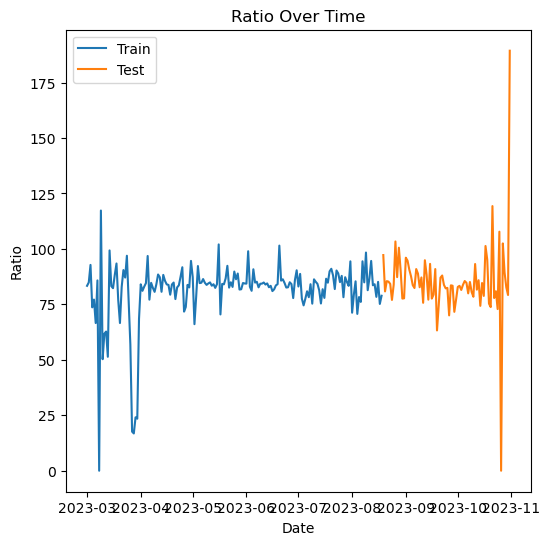

In [28]:
# Plotting the data
plt.figure(figsize=(6, 6))  # Setting the figure size for the plot
plt.plot(train_fbo0023["Ratio"], label='Train')  # Plotting the training data
plt.plot(test_fbo0023["Ratio"], label='Test')  # Plotting the testing data
plt.title('Ratio Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Ratio')  # Y-axis label
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot

In [29]:
# ARIMA modeling
from pmdarima import auto_arima  # Importing the auto_arima function from pmdarima
  # Creating a new series 'train1' for ARIMA modeling
auto_model = auto_arima(train_fbo0023["Ratio"], seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)  # Fitting the ARIMA model
auto_model.summary()  # Displaying the summary of the model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1430.354, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1366.350, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1369.446, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1428.354, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1365.794, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1367.494, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1365.968, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1363.799, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1364.354, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1365.498, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1363.972, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  171
Model:               SARIMAX(4, 1, 1)   Log Likelihood                -665.877
Date:                Fri, 10 May 2024   AIC                           1343.755
Time:                        10:03:49   BIC                           1362.569
Sample:                    03-01-2023   HQIC                          1351.389
                         - 08-18-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2001      0.036      5.545      0.000       0.129       0.271
ar.L2          0.4062      0.073      5.546      0.000       0.263       0.550
ar.L3          0.0105      0.059      0.177      0.860      -0.105       0.126
ar.L4         -0.2049      0.078     -2.637      0.008      -0.357      -0.053
ma.L1         -0.9666      0.043    -22.302      0.000      -1.052      -0.882
sigma2       145.9279      8.427     17.316      0.000     129.411     162.445
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1104.77
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
# Further ARIMA modeling and forecasting
from statsmodels.tsa.arima.model import ARIMA  # Importing the ARIMA model
#data.index.freq = "1min"  # Setting the frequency of the data index to 1 minute
#data.index = pd.DatetimeIndex(data.index).to_period("1min")  # Converting the data index to DatetimeIndex with 1-minute period


In [31]:
#np.asarray(train_fbo0023)

train_fbo0023.dtypes

PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [32]:
# Calculate the means and convert Series to DataFrame
data_mean = data.groupby(data.index.date)['Ratio'].mean().reset_index(name='Ratio')
data_mean_sunrad = data.groupby(data.index.date)['SunRad'].mean().reset_index(name='SunRad')
data_mean_temp = data.groupby(data.index.date)['Temperature'].mean().reset_index(name='Temperature')


# Merge the DataFrames on 'ValueTime'

data_mean.columns = ['ValueTime', 'Ratio']
data_mean_sunrad.columns = ['ValueTime', 'SunRad']
data_mean_temp.columns = ['ValueTime', 'Temperature']
combined_data = pd.merge(pd.merge(data_mean, data_mean_sunrad, on='ValueTime'), data_mean_temp, on='ValueTime')

# Save the DataFrames to CSV
data_mean.to_csv('meandata/Ratio_data.csv', index=False)
data_mean_sunrad.to_csv('meandata/Sunrad_data.csv', index=False)
data_mean_temp.to_csv('meandata/Temperature_data.csv', index=False)
combined_data.to_csv('meandata/Combined_Means.csv', index=False)



# Read the CSV files back into the environment
Ratio_data = pd.read_csv('meandata/Ratio_data.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
sunrad_data = pd.read_csv('meandata/Sunrad_data.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
Temp_data = pd.read_csv('meandata/Temperature_data.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
combined_data_check = pd.read_csv('meandata/Combined_Means.csv', index_col="ValueTime", parse_dates=True).asfreq('D')

# Print the DataFrame to verify the changes
print(combined_data_check.head())

                Ratio       SunRad  Temperature
ValueTime                                      
2023-03-01  84.119981  3157.368421     7.719438
2023-03-02  81.698483  2765.789474     7.022628
2023-03-03  78.830570  1624.210526     4.672189
2023-03-04  87.050801  2344.736842     1.097927
2023-03-05  88.048989  2388.947368     1.059450


In [33]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

def split_and_save(data, filename_prefix):
    # Determine the split point for 70% train, 30% test
    split_point = int(0.7 * len(data))
    train, test = data[:split_point], data[split_point:]

    # Save the train and test data to CSV
    train.to_csv(f'TrainTest/{filename_prefix}_train.csv')
    test.to_csv(f'TrainTest/{filename_prefix}_test.csv')



    # Return the model if you need to use it outside the function
    return auto_model

# Example usage:
ratio_model = split_and_save(Ratio_data, 'Ratio')
sunrad_model = split_and_save(sunrad_data, 'SunRad')
temp_model = split_and_save(Temp_data, 'Temperature')
combined_data_model = split_and_save(combined_data_check, "Combined")

In [34]:
import pandas as pd

def load_train_test(filename_prefix):
    # Load the train and test data from CSV files
    train = pd.read_csv(f'TrainTest/{filename_prefix}_train.csv',index_col="ValueTime", parse_dates=True).asfreq('D')
    test = pd.read_csv(f'TrainTest/{filename_prefix}_test.csv', index_col="ValueTime", parse_dates=True).asfreq('D')

    return train, test

# Load Ratio data sets
ratio_train, ratio_test = load_train_test('Ratio')
print("Loaded Ratio Train Data:")
print(ratio_train.head())

# Load SunRad data sets
sunrad_train, sunrad_test = load_train_test('SunRad')
print("Loaded SunRad Train Data:")
print(sunrad_train.head())

# Load Temperature data sets
temp_train, temp_test = load_train_test('Temperature')
print("Loaded Temperature Train Data:")
print(temp_train.head())



combined_train, combined_test = load_train_test('combined')



Loaded Ratio Train Data:
                Ratio
ValueTime            
2023-03-01  84.119981
2023-03-02  81.698483
2023-03-03  78.830570
2023-03-04  87.050801
2023-03-05  88.048989
Loaded SunRad Train Data:
                 SunRad
ValueTime              
2023-03-01  3157.368421
2023-03-02  2765.789474
2023-03-03  1624.210526
2023-03-04  2344.736842
2023-03-05  2388.947368
Loaded Temperature Train Data:
            Temperature
ValueTime              
2023-03-01     7.719438
2023-03-02     7.022628
2023-03-03     4.672189
2023-03-04     1.097927
2023-03-05     1.059450


In [35]:
print(ratio_train["Ratio"])


ValueTime
2023-03-01    84.119981
2023-03-02    81.698483
2023-03-03    78.830570
2023-03-04    87.050801
2023-03-05    88.048989
2023-03-06    56.009619
2023-03-07    86.107265
2023-03-08     9.545693
2023-03-09    25.675352
2023-03-10    25.479173
2023-03-11    39.749359
2023-03-12    44.412006
2023-03-13    47.714979
2023-03-14    79.223315
2023-03-15    84.423499
2023-03-16    83.336288
2023-03-17    85.431557
2023-03-18    87.624111
2023-03-19    92.365907
2023-03-20    90.207029
2023-03-21    89.294234
2023-03-22    91.048328
2023-03-23    85.588490
2023-03-24    89.251661
2023-03-25    54.898642
2023-03-26    23.161081
2023-03-27    16.290951
2023-03-28    31.010529
2023-03-29    44.777955
2023-03-30    39.916732
2023-03-31    68.950919
2023-04-01    80.811175
2023-04-02    84.548051
2023-04-03    82.383975
2023-04-04    86.821628
2023-04-05    79.613278
2023-04-06    79.440596
2023-04-07    89.908573
2023-04-08    82.730049
2023-04-09    75.602404
2023-04-10    84.519322
2023-0

In [36]:
auto_model = auto_arima(ratio_train['Ratio'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())
best_order = auto_model.order


model = ARIMA(ratio_train, order=(best_order))  # Initializing the ARIMA model with specified order
fitted_model_mean = model.fit()  # Fitting the ARIMA model
fitted_model_mean.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1262.728, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1272.645, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1260.966, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1263.928, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1270.648, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1261.280, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1261.963, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1258.968, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1259.282, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1259.965, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1261.930, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.097 seconds
                               S

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Ratio   No. Observations:                  171
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -627.484
Date:                Fri, 10 May 2024   AIC                           1258.968
Time:                        10:03:50   BIC                           1265.239
Sample:                    03-01-2023   HQIC                          1261.513
                         - 08-18-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2777      0.038     -7.297      0.000      -0.352      -0.203
sigma2        94.0494      3.820     24.619      0.000      86.562     101.537
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              2096.52
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -2.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
ratio_train.dtypes

Ratio    float64
dtype: object

In [38]:
forecast_arima_mean = fitted_model_mean.forecast(steps=len(ratio_test))  # Forecasting using the fitted model
#print(ratio_test)
print(ratio_test  )



                 Ratio
ValueTime             
2023-08-19   80.265614
2023-08-20   91.650841
2023-08-21   81.941394
2023-08-22   86.788083
2023-08-23   83.029638
2023-08-24   87.142519
2023-08-25   93.720072
2023-08-26   88.528402
2023-08-27   77.453906
2023-08-28   90.584607
2023-08-29   84.945415
2023-08-30   87.101079
2023-08-31   83.910025
2023-09-01   91.503953
2023-09-02   85.956077
2023-09-03   87.965756
2023-09-04   80.581833
2023-09-05   83.920371
2023-09-06   80.956236
2023-09-07   84.531546
2023-09-08   85.326071
2023-09-09   79.988057
2023-09-10   80.600699
2023-09-11   84.693600
2023-09-12   94.239683
2023-09-13   90.737051
2023-09-14   77.240844
2023-09-15   89.020894
2023-09-16   80.763081
2023-09-17   80.243170
2023-09-18   83.937958
2023-09-19   94.772469
2023-09-20   89.049536
2023-09-21   80.330418
2023-09-22   78.077951
2023-09-23   79.962752
2023-09-24   80.665181
2023-09-25   85.770657
2023-09-26   79.032700
2023-09-27   81.466987
2023-09-28   79.338590
2023-09-29 

In [39]:
print(forecast_arima_mean) # 'B' colum)

2023-08-19    79.732169
2023-08-20    79.173875
2023-08-21    79.328902
2023-08-22    79.285854
2023-08-23    79.297808
2023-08-24    79.294489
2023-08-25    79.295410
2023-08-26    79.295154
2023-08-27    79.295225
2023-08-28    79.295206
2023-08-29    79.295211
2023-08-30    79.295210
2023-08-31    79.295210
2023-09-01    79.295210
2023-09-02    79.295210
2023-09-03    79.295210
2023-09-04    79.295210
2023-09-05    79.295210
2023-09-06    79.295210
2023-09-07    79.295210
2023-09-08    79.295210
2023-09-09    79.295210
2023-09-10    79.295210
2023-09-11    79.295210
2023-09-12    79.295210
2023-09-13    79.295210
2023-09-14    79.295210
2023-09-15    79.295210
2023-09-16    79.295210
2023-09-17    79.295210
2023-09-18    79.295210
2023-09-19    79.295210
2023-09-20    79.295210
2023-09-21    79.295210
2023-09-22    79.295210
2023-09-23    79.295210
2023-09-24    79.295210
2023-09-25    79.295210
2023-09-26    79.295210
2023-09-27    79.295210
2023-09-28    79.295210
2023-09-29    79

Mean Absolute Error (MAE): 6.58
Plot saved to Plot_ARIMA_MEAN/forecast_plot_forecast.png


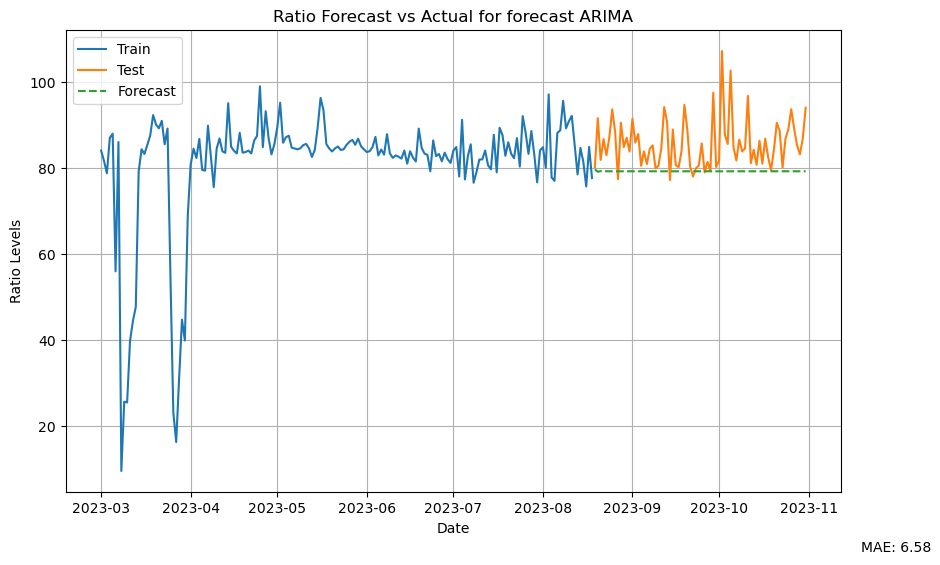

'Plot_ARIMA_MEAN/forecast_plot_forecast.png'

In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import os

# Ensure the directory for saving plots exists
save_dir = "Plot_ARIMA_MEAN"
os.makedirs(save_dir, exist_ok=True)

def plot_forecast(train, test, forecast, key, show=True, save=False):
    identifier = key.split('_')[-1]  # Splits the key and takes the last part, which is the identifier
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'Ratio Forecast vs Actual for {identifier} ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast_arima_mean - ratio_test["Ratio"]))

    print('Mean Absolute Error (MAE):', np.round(MAE, 2))
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

    if save:
        save_path = f'{save_dir}/forecast_plot_{identifier}.png'
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved to {save_path}")

    if show:
        plt.show()
    else:
        plt.close()

    return save_path if save else None

# Example usage:
# Assuming ratio_train, ratio_test, and forecast_arima_mean are defined and valid pandas Series with datetime indices
plot_forecast(ratio_train, ratio_test, forecast_arima_mean, key="arima_ratio_forecast", show=True, save=True)

# Calculating and Printing Mean Absolute Error (MAE)


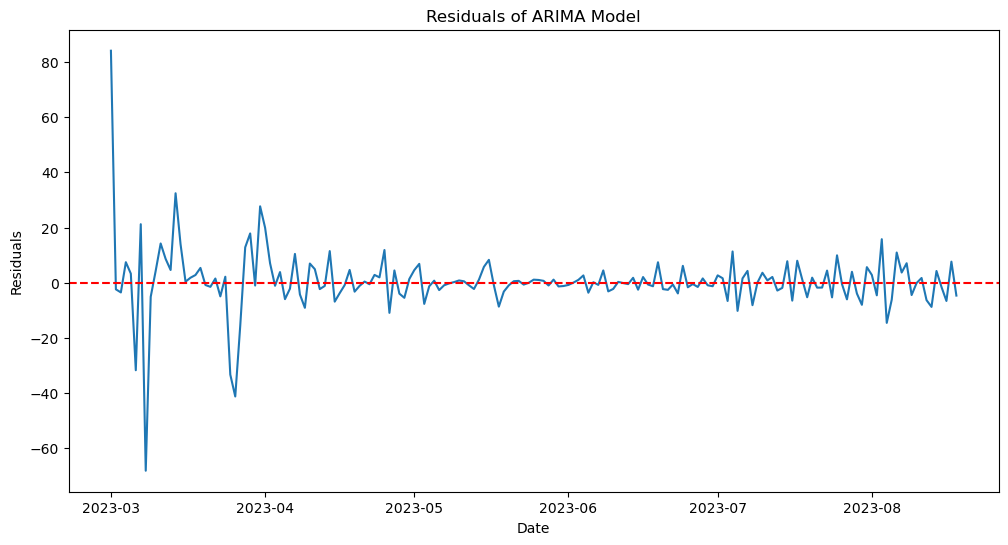

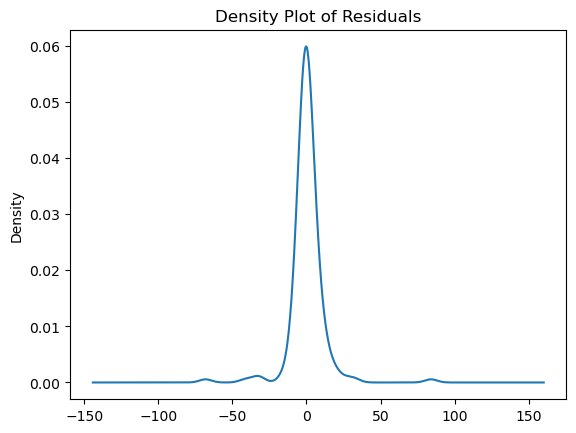

Ljung-Box test p-value: lb_pvalue
Shapiro-Wilk Test p-value: 1.1075188223102104e-17


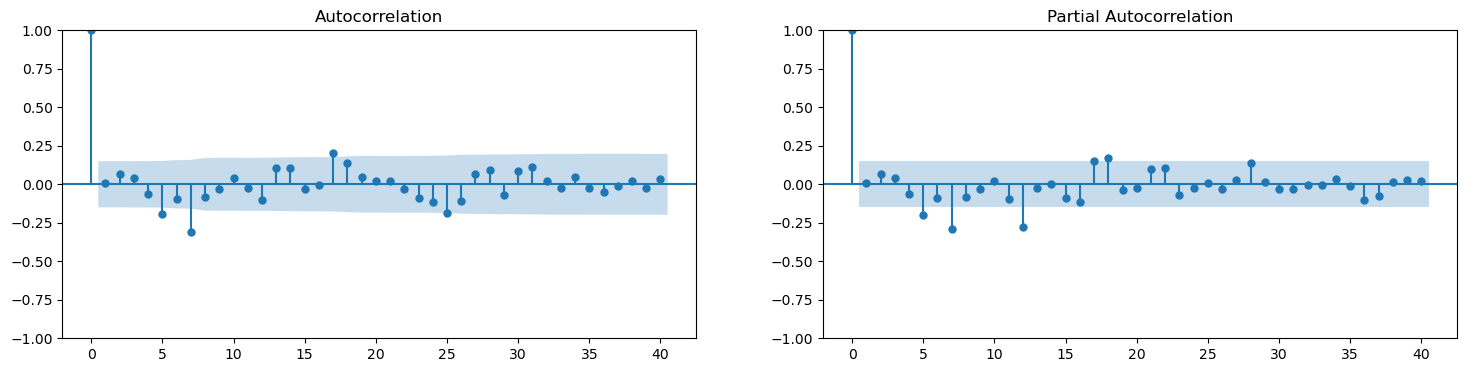

In [41]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Assuming 'model_fit' is your fitted ARIMA model
residuals = fitted_model_mean.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Density plot of residuals
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()

# Ljung-Box test
lb_value, lb_pvalue = acorr_ljungbox(residuals, lags=[10], return_df=False)
print("Ljung-Box test p-value:", lb_pvalue)

# Shapiro-Wilk test for normality
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test p-value:', p)

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax2)
plt.show()


In [42]:
plant_keys = [
    'FBO0023', 'FSK0003', 'FSK0005', 'FSK0006', 'FSK0007', 'FSK0008',
    'MIC0001', 'SBO0001', 'SBO0002', 'SBO0005', 'SBO0007', 
     'SBO0011', 'SBO0012', 'SBO0013', 'SBO0014', 'SBO0015',
    'SBO0016', 'SBO0017', 'SBO0028',  'SBO0030', 'SGA0001'
]

datasets = [
    "train_ratio_fbo0023", "test_ratio_fbo0023",
    "train_ratio_fsk0003", "test_ratio_fsk0003",
    "train_ratio_fsk0005", "test_ratio_fsk0005",
    "train_ratio_fsk0006", "test_ratio_fsk0006",
    "train_ratio_fsk0007", "test_ratio_fsk0007",
    "train_ratio_fsk0008", "test_ratio_fsk0008",
    "train_ratio_mic0001", "test_ratio_mic0001",
    "train_ratio_sbo0001", "test_ratio_sbo0001",
    "train_ratio_sbo0002", "test_ratio_sbo0002",
    "train_ratio_sbo0005", "test_ratio_sbo0005",
    "train_ratio_sbo0007", "test_ratio_sbo0007",
    "train_ratio_sbo0011", "test_ratio_sbo0011",
    "train_ratio_sbo0012", "test_ratio_sbo0012",
    "train_ratio_sbo0013", "test_ratio_sbo0013",
    "train_ratio_sbo0014", "test_ratio_sbo0014",
    "train_ratio_sbo0015", "test_ratio_sbo0015",
    "train_ratio_sbo0016", "test_ratio_sbo0016",
    "train_ratio_sbo0017", "test_ratio_sbo0017",
    "train_ratio_sbo0028", "test_ratio_sbo0028",
    "train_ratio_sbo0030", "test_ratio_sbo0030",
    "train_ratio_sga0001", "test_ratio_sga0001"
]


# Initialize the dictionary with datasets
data_frames = {
    'train_ratio_fbo0023': train_ratio_fbo0023,
    'train_ratio_fsk0003': train_ratio_fsk0003,
    'train_ratio_fsk0005': train_ratio_fsk0005,
    'train_ratio_fsk0006': train_ratio_fsk0006,
    'train_ratio_fsk0007': train_ratio_fsk0007,
    'train_ratio_fsk0008': train_ratio_fsk0008,
    'train_ratio_mic0001': train_ratio_mic0001,
    'train_ratio_sbo0001': train_ratio_sbo0001,
    'train_ratio_sbo0002': train_ratio_sbo0002,
    'train_ratio_sbo0005': train_ratio_sbo0005,
    'train_ratio_sbo0007': train_ratio_sbo0007,
    'train_ratio_sbo0011': train_ratio_sbo0011,
    'train_ratio_sbo0012': train_ratio_sbo0012,
    'train_ratio_sbo0013': train_ratio_sbo0013,
    'train_ratio_sbo0014': train_ratio_sbo0014,
    'train_ratio_sbo0015': train_ratio_sbo0015,
    'train_ratio_sbo0016': train_ratio_sbo0016,
    'train_ratio_sbo0017': train_ratio_sbo0017,
    'train_ratio_sbo0028': train_ratio_sbo0028,
    'train_ratio_sbo0030': train_ratio_sbo0030,
    'train_ratio_sga0001': train_ratio_sga0001,
}


# Checking stationarity
adf_result = adfuller(train_fbo0023["Ratio"])  # Applying Augmented Dickey-Fuller test to check stationarity
#print(adf_result)



train.to_csv(f'{plantkey}_train.csv')

from statsmodels.tsa.stattools import adfuller

# Function to perform the ADF test
# Function to perform the ADF test
# Function to perform the ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")
    return result[1]

# Checking stationarity and differencing if needed
for key, df in data_frames.items():
    if 'Ratio' in df.columns:
        print(f"Testing stationarity for {key}...")
        p_value = adf_test(df['Ratio'], title=key)

        if p_value > 0.05:
            print(f"Data in {key} is non-stationary, differencing...")
            df['Ratio'] = df['Ratio'].diff()  # Differencing
            df.dropna(inplace=True)
            if not df['Ratio'].empty:  # Check if the DataFrame is not empty after dropping NaN
                p_value = adf_test(df['Ratio'], title=f"{key} after differencing")
                print(f"New p-value for {key} after differencing: {p_value}")
            else:
                print(f"No data left in {key} after differencing and dropping NaNs.")

        #df.to_csv(f'{key}.csv')













Testing stationarity for train_ratio_fbo0023...
ADF Statistic for train_ratio_fbo0023: -5.380959043571548
p-value: 3.7134875074202514e-06
Data is stationary
Testing stationarity for train_ratio_fsk0003...
ADF Statistic for train_ratio_fsk0003: -3.022429791542096
p-value: 0.0328521724472415
Data is stationary
Testing stationarity for train_ratio_fsk0005...
ADF Statistic for train_ratio_fsk0005: -2.823154397584662
p-value: 0.05504168751386671
Data is non-stationary
Data in train_ratio_fsk0005 is non-stationary, differencing...
ADF Statistic for train_ratio_fsk0005 after differencing: -13.463544788568466
p-value: 3.4919816584382144e-25
Data is stationary
New p-value for train_ratio_fsk0005 after differencing: 3.4919816584382144e-25
Testing stationarity for train_ratio_fsk0006...
ADF Statistic for train_ratio_fsk0006: -5.207643196544702
p-value: 8.481622330132213e-06
Data is stationary
Testing stationarity for train_ratio_fsk0007...
ADF Statistic for train_ratio_fsk0007: -4.621221302276298

In [43]:
print(test_ratio_fbo0023)

                 Ratio
ValueTime             
2023-08-19   97.229065
2023-08-20   80.846616
2023-08-21   85.480387
2023-08-22   85.252788
2023-08-23   84.221885
2023-08-24   77.007237
2023-08-25   83.848191
2023-08-26  103.360453
2023-08-27   87.278142
2023-08-28  100.546659
2023-08-29   90.409085
2023-08-30   77.607540
2023-08-31   77.730197
2023-09-01   96.042224
2023-09-02   94.718512
2023-09-03   90.694064
2023-09-04   87.669861
2023-09-05   83.668607
2023-09-06   82.371296
2023-09-07   90.926666
2023-09-08   88.889390
2023-09-09   82.718394
2023-09-10   87.133688
2023-09-11   75.708590
2023-09-12   94.892333
2023-09-13   88.364100
2023-09-14   77.126135
2023-09-15   93.262805
2023-09-16   77.602320
2023-09-17   79.377341
2023-09-18   90.923302
2023-09-19   63.250063
2023-09-20   74.635518
2023-09-21   87.040349
2023-09-22   88.016620
2023-09-23   83.794274
2023-09-24   82.216453
2023-09-25   82.438815
2023-09-26   70.037709
2023-09-27   83.589037
2023-09-28   83.407950
2023-09-29 

In [44]:
print(train_ratio_fbo0023)


                 Ratio
ValueTime             
2023-03-01   83.366332
2023-03-02   84.896073
2023-03-03   92.794724
2023-03-04   73.666501
2023-03-05   77.158911
2023-03-06   66.579521
2023-03-07   85.800027
2023-03-08    0.000000
2023-03-09  117.307351
2023-03-10   50.280631
2023-03-11   61.809775
2023-03-12   62.742578
2023-03-13   51.371054
2023-03-14   99.325153
2023-03-15   83.209343
2023-03-16   82.298363
2023-03-17   88.244696
2023-03-18   93.432331
2023-03-19   76.915671
2023-03-20   66.585534
2023-03-21   82.889189
2023-03-22   90.461101
2023-03-23   87.095022
2023-03-24   96.924932
2023-03-25   77.323322
2023-03-26   56.896526
2023-03-27   17.632419
2023-03-28   16.802443
2023-03-29   24.082834
2023-03-30   23.457581
2023-03-31   68.467427
2023-04-01   84.035227
2023-04-02   81.109325
2023-04-03   82.991958
2023-04-04   84.588381
2023-04-05   96.818125
2023-04-06   77.130138
2023-04-07   84.706322
2023-04-08   82.451908
2023-04-09   80.641651
2023-04-10   84.033967
2023-04-11 

Processing train_ratio_fbo0023
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

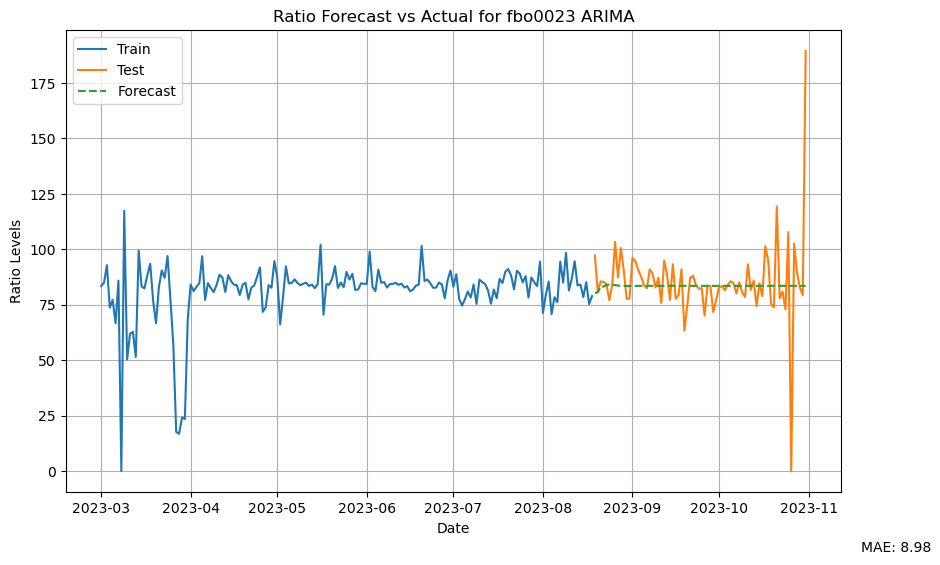

Processing train_ratio_fsk0003
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

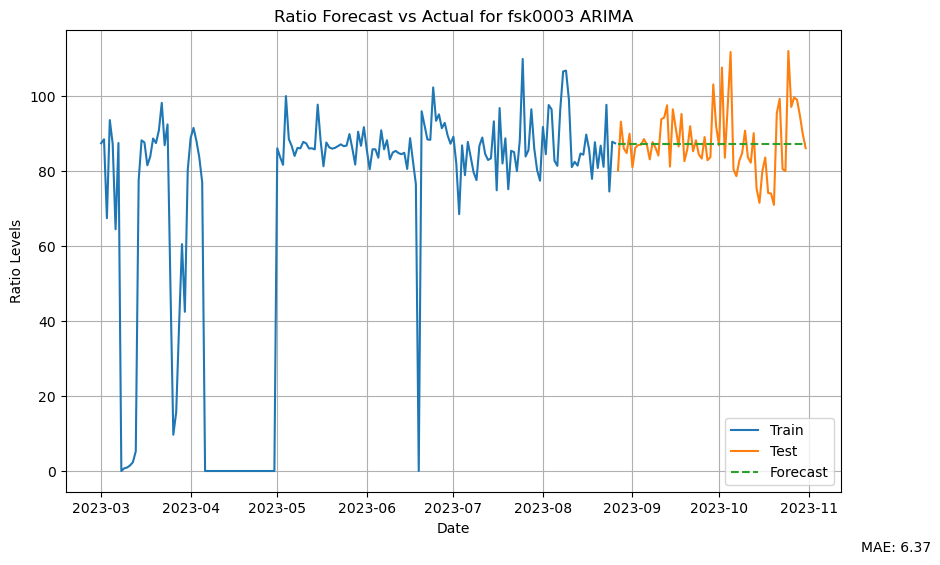

Processing train_ratio_fsk0005
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

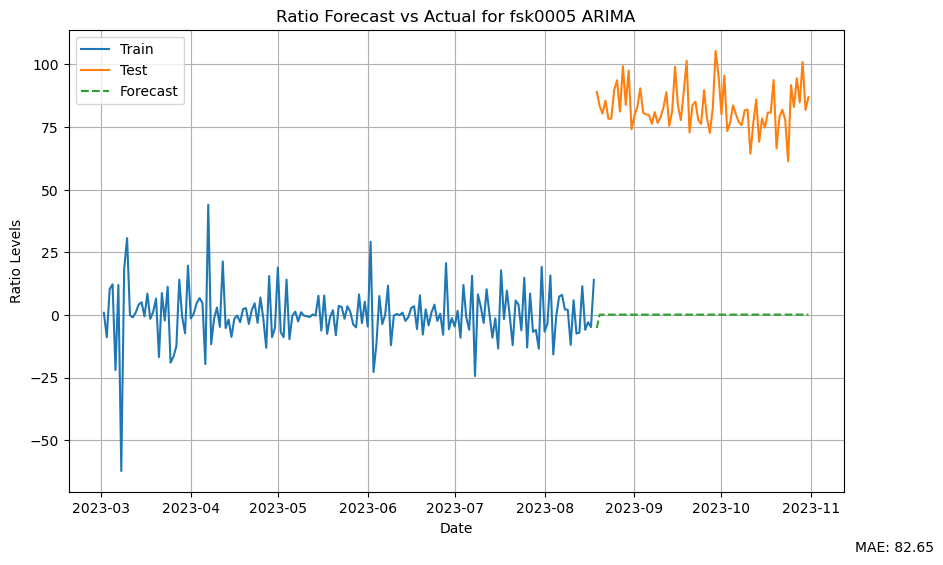

Processing train_ratio_fsk0006
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

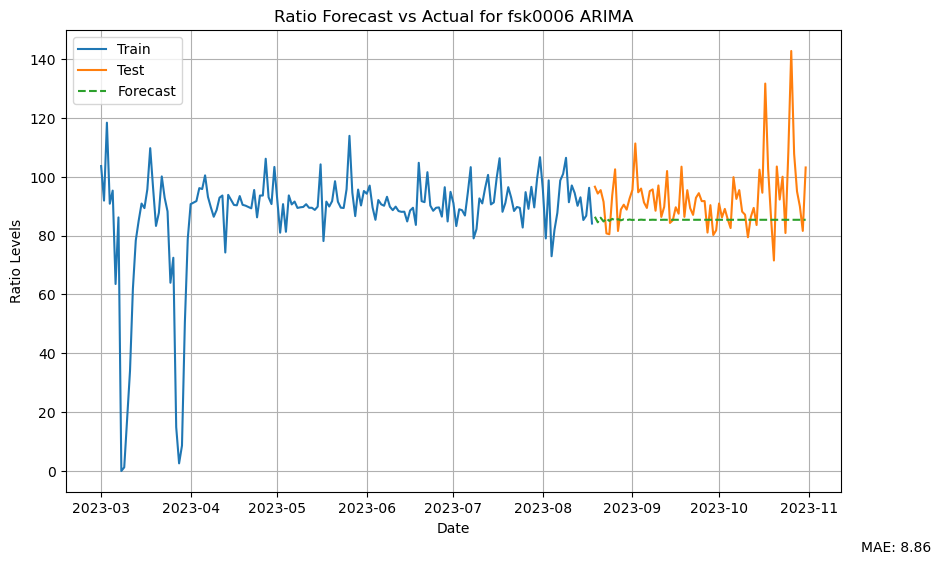

Processing train_ratio_fsk0007
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

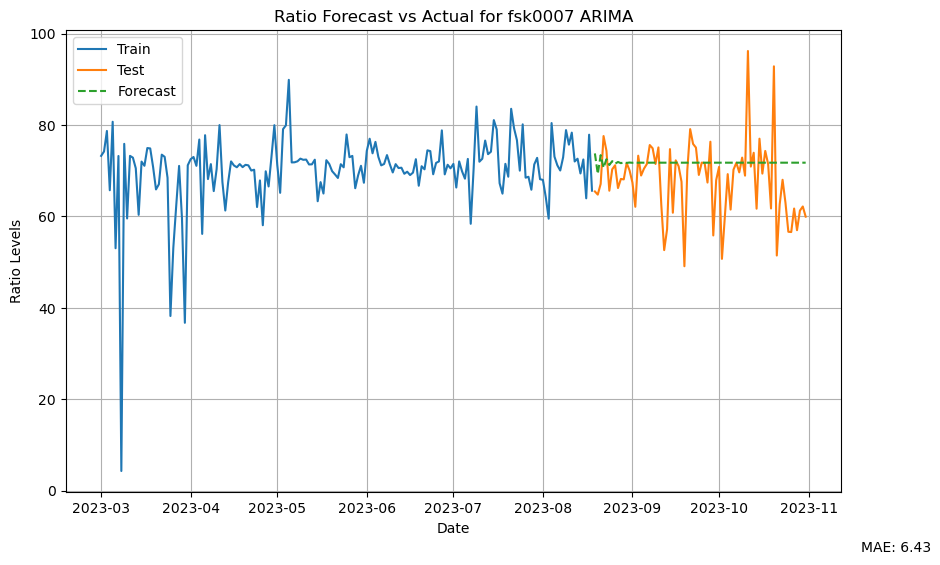

Processing train_ratio_fsk0008
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

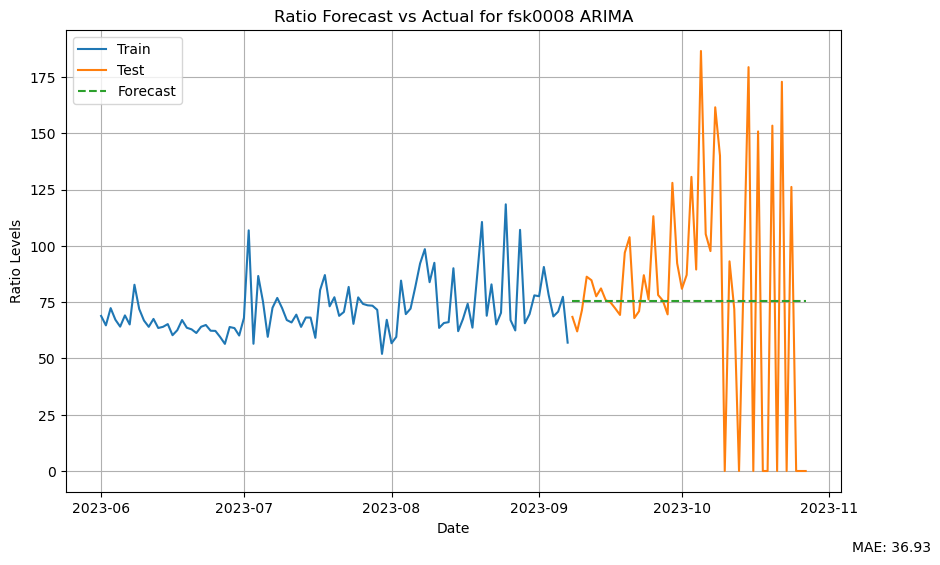

Processing train_ratio_mic0001
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

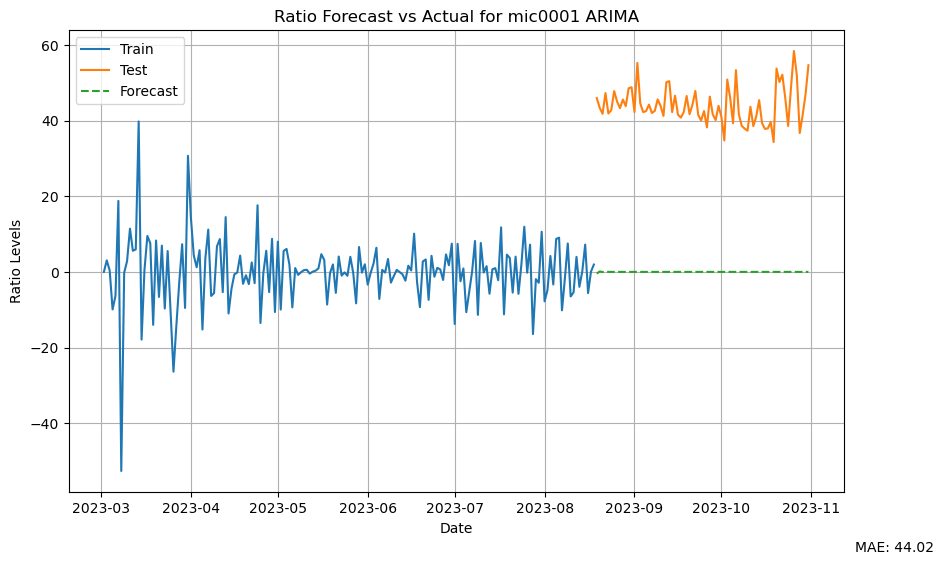

Processing train_ratio_sbo0001
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

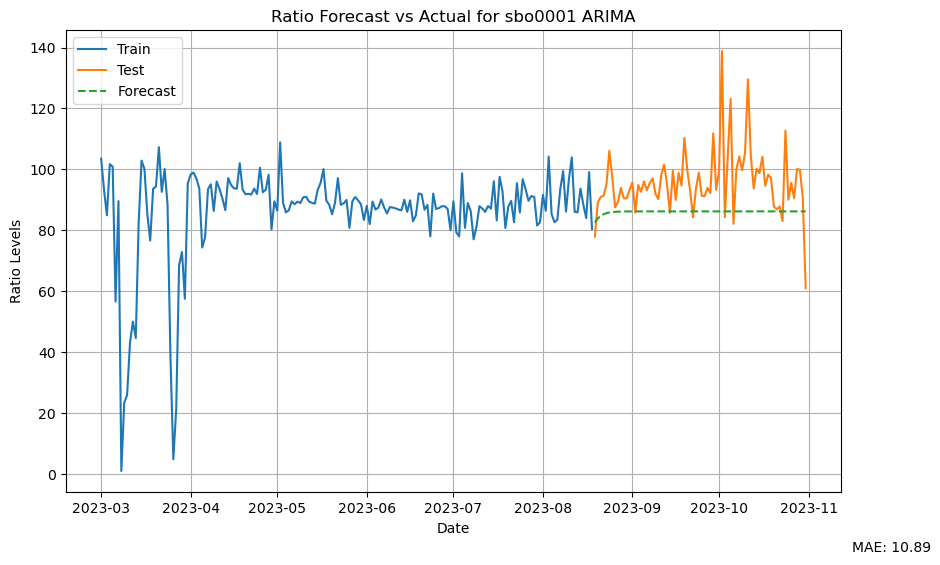

Processing train_ratio_sbo0002
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

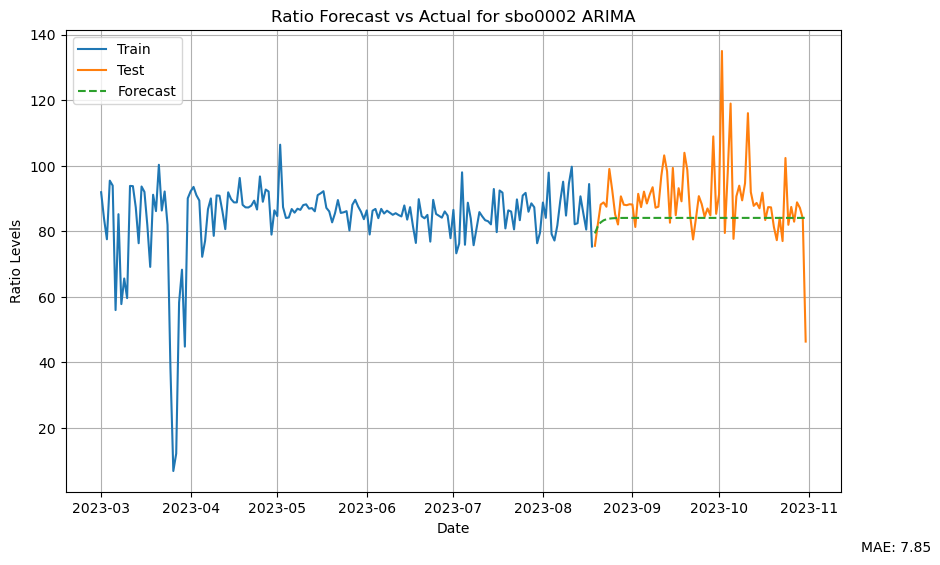

Processing train_ratio_sbo0005
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


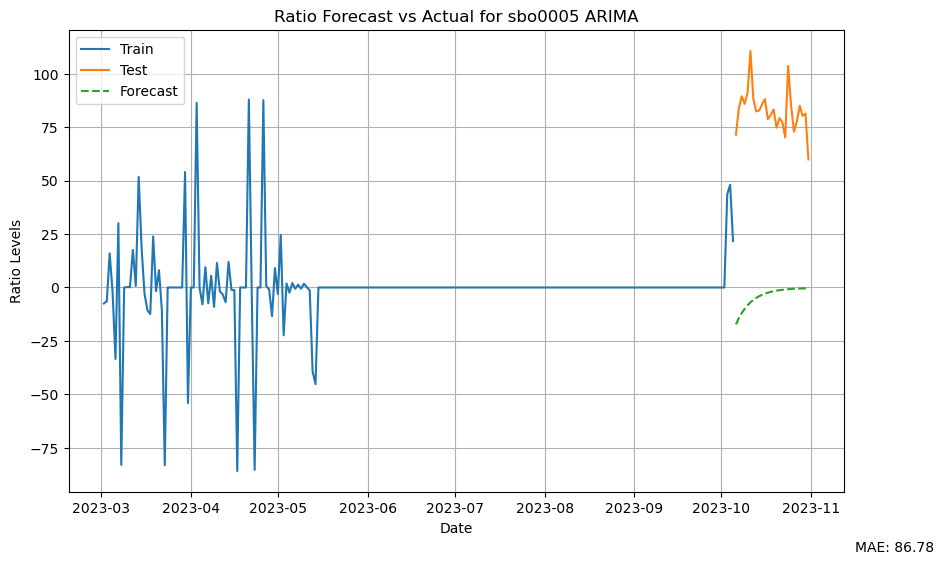

Processing train_ratio_sbo0007
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

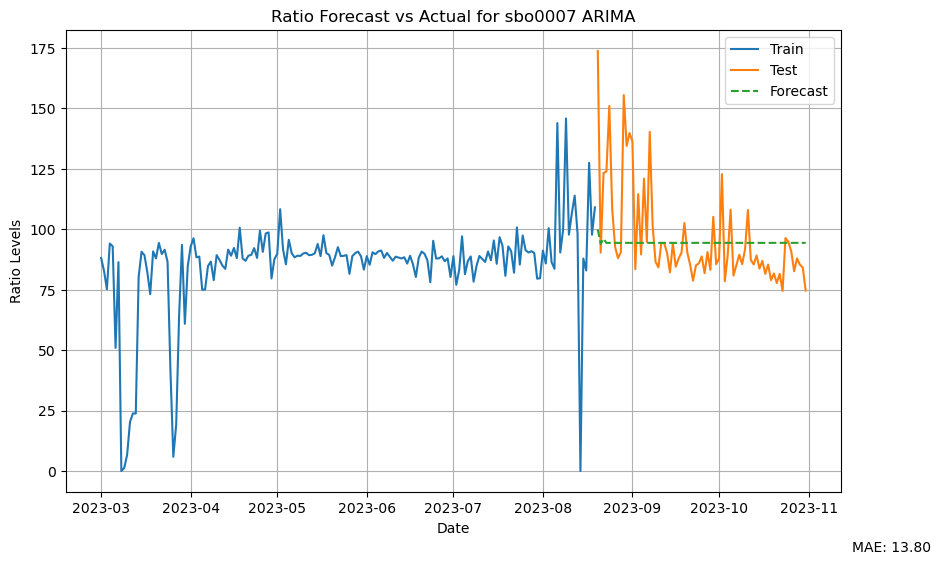

Processing train_ratio_sbo0011
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

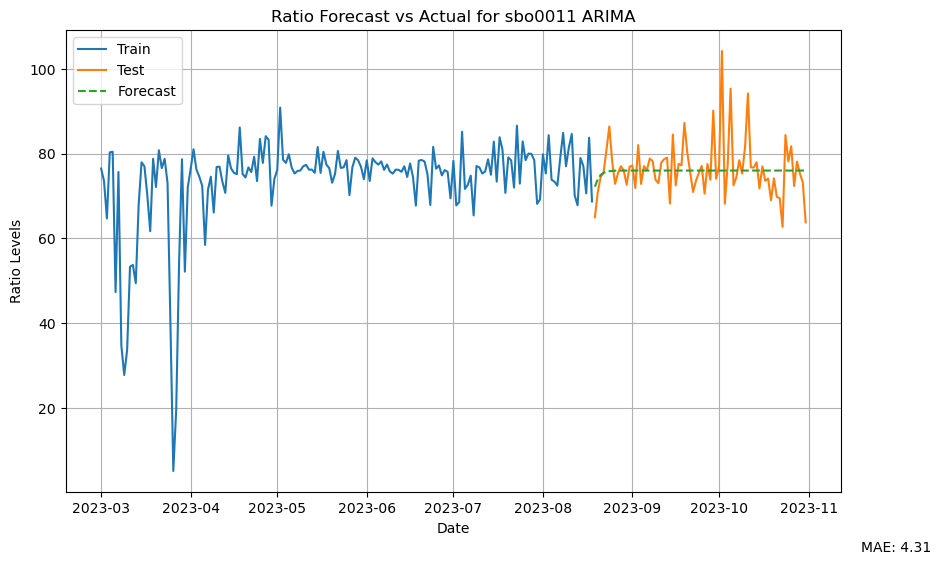

Processing train_ratio_sbo0012
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

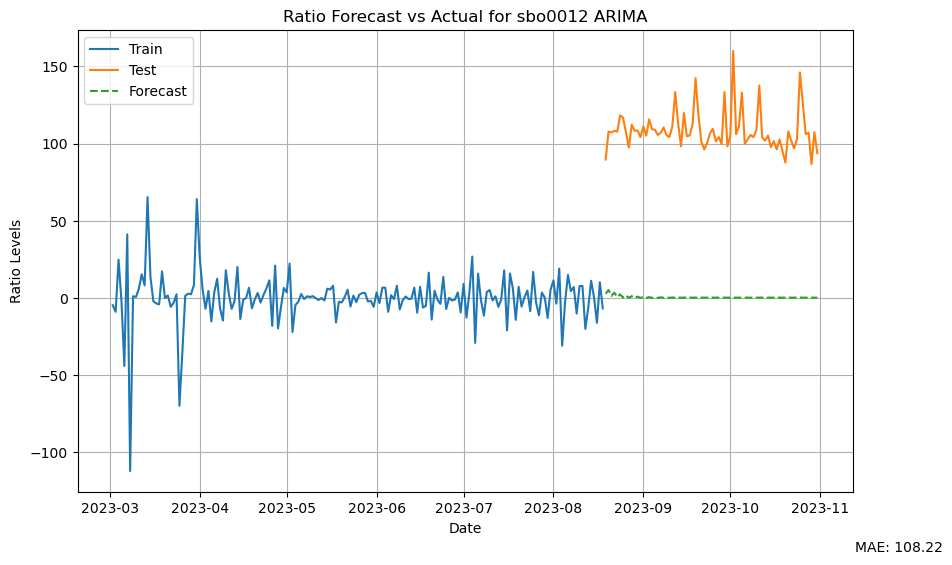

Processing train_ratio_sbo0013
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

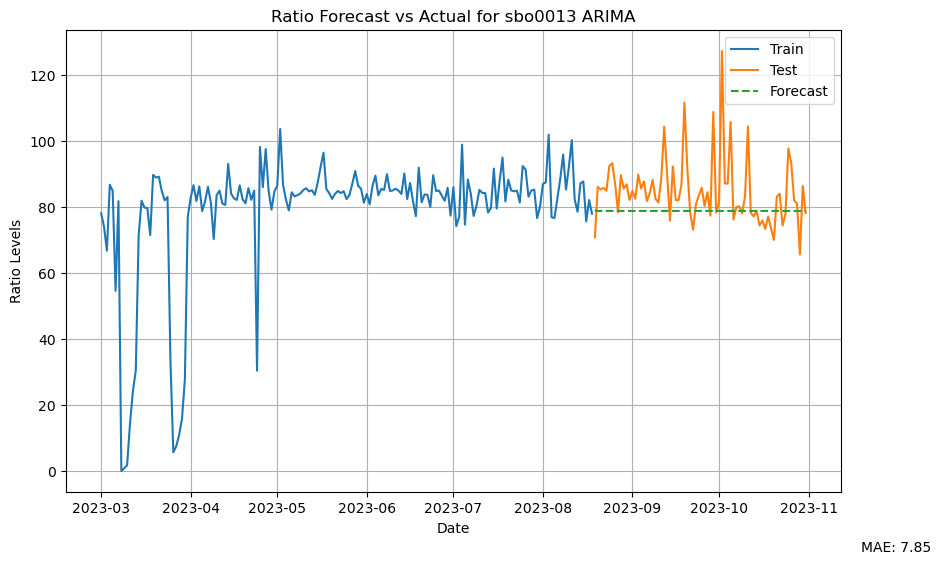

Processing train_ratio_sbo0014
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

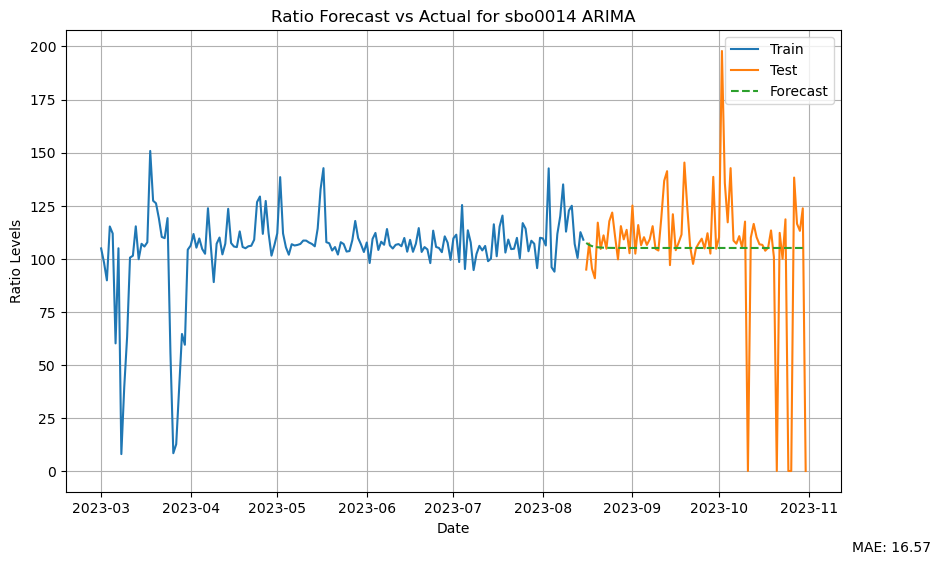

Processing train_ratio_sbo0015
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing test test_ratio_sbo0015
Mean Absolute Error (MAE): 84.97


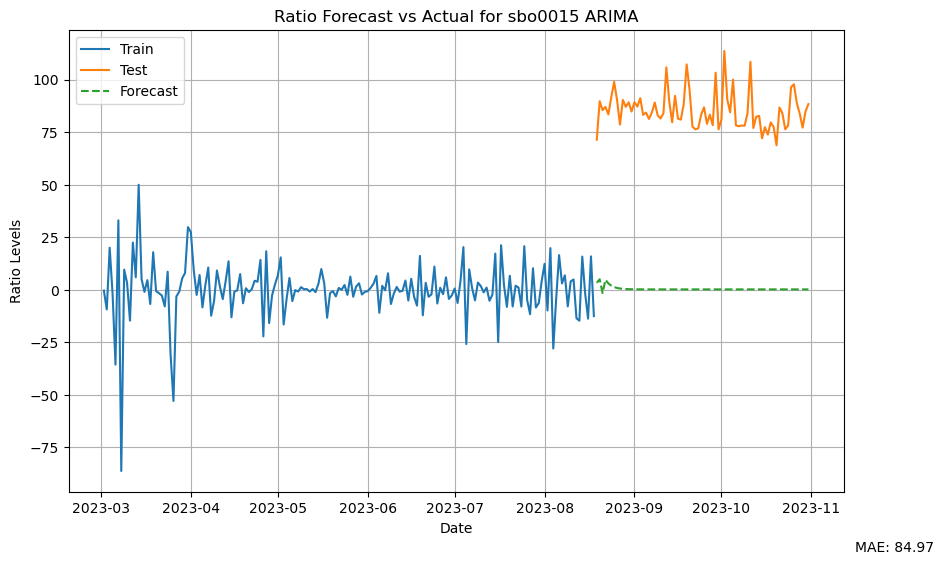

Processing train_ratio_sbo0016
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

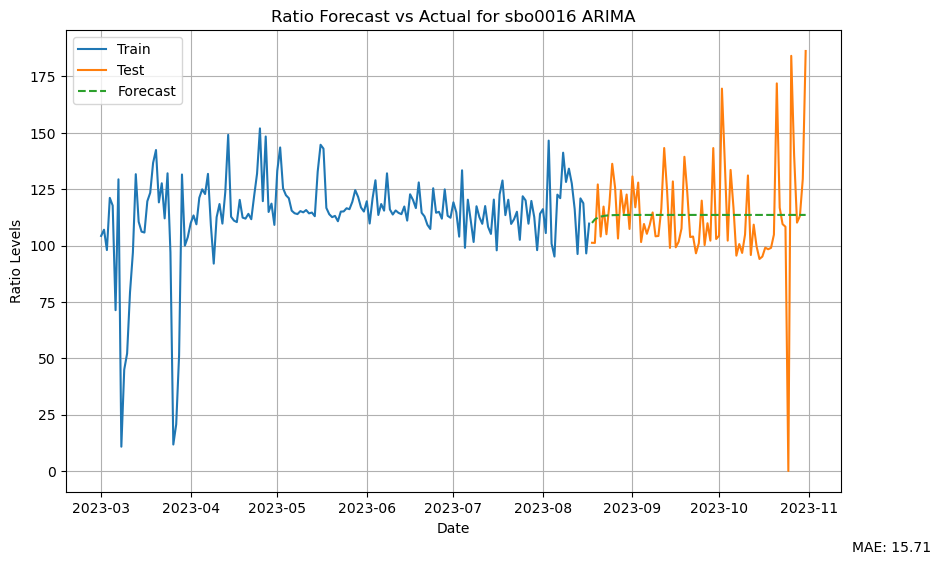

Processing train_ratio_sbo0017
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

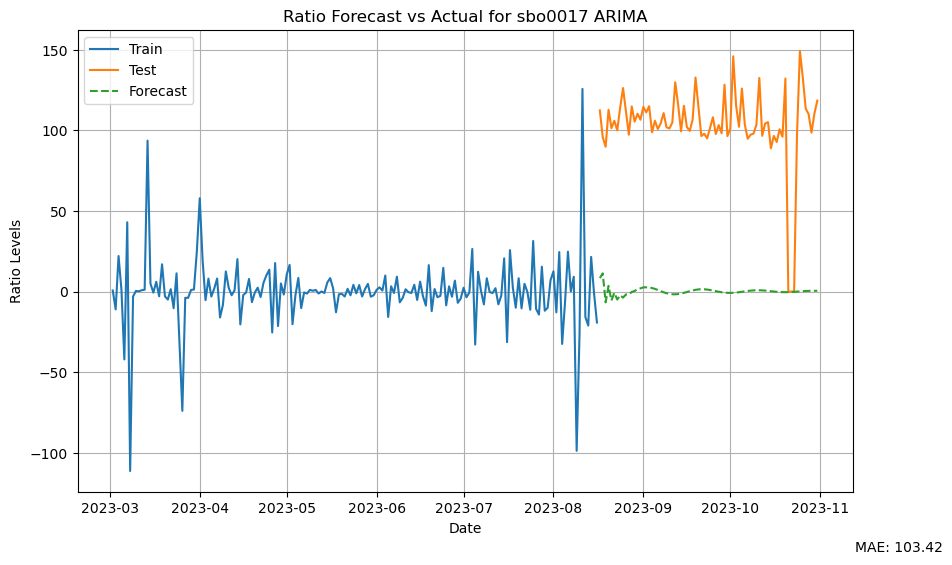

Processing train_ratio_sbo0028
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

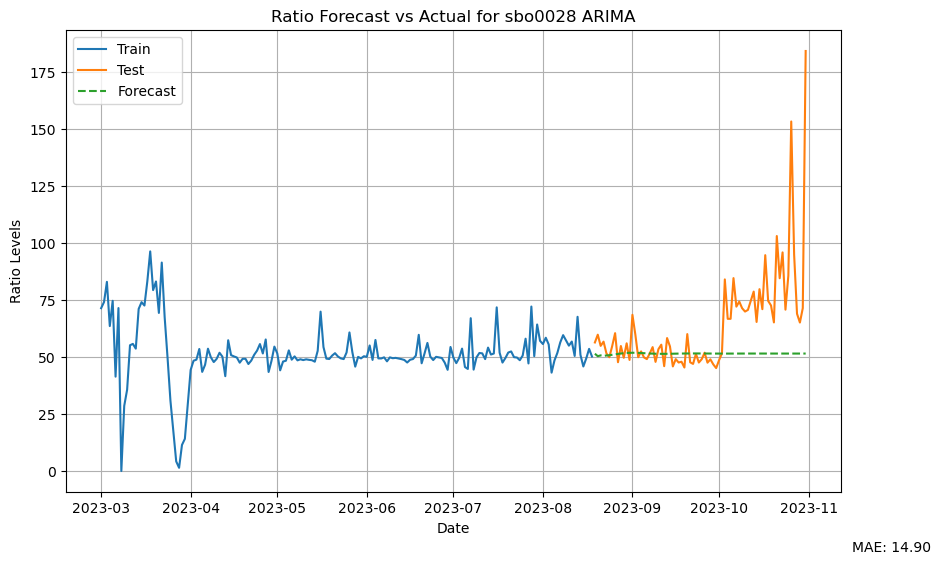

Processing train_ratio_sbo0030
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

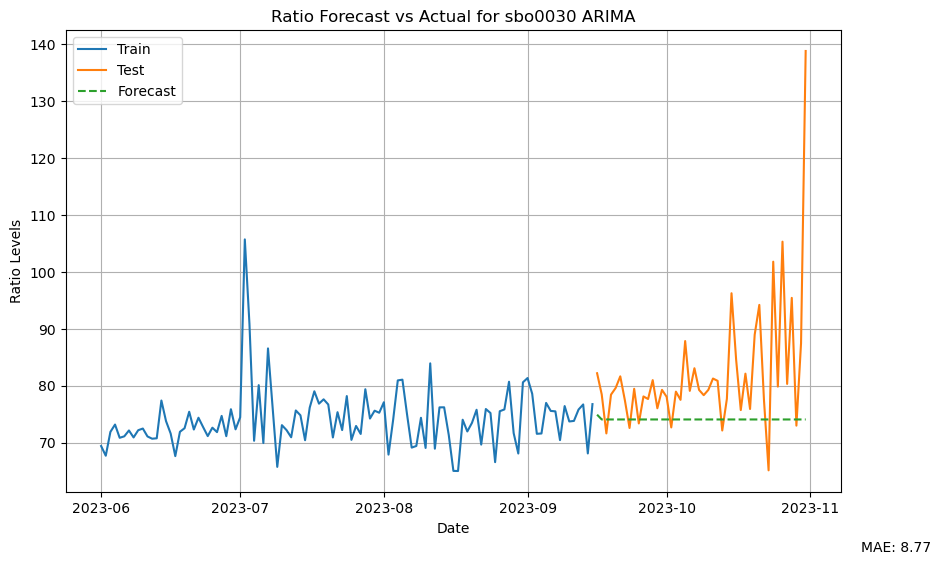

Processing train_ratio_sga0001
                 Ratio
ValueTime             
2023-03-01   50.192532
2023-03-02   55.228100
2023-03-03   71.712063
2023-03-04   49.587199
2023-03-05   55.307589
2023-03-06   42.154732
2023-03-07   64.889492
2023-03-08    1.053256
2023-03-09    2.952869
2023-03-10    6.983369
2023-03-11   11.902100
2023-03-12   10.492168
2023-03-13    8.227477
2023-03-14   61.708485
2023-03-15   44.501693
2023-03-16   46.436426
2023-03-17   74.136467
2023-03-18  101.946349
2023-03-19   93.481713
2023-03-20   78.645512
2023-03-21   58.169179
2023-03-22   79.699989
2023-03-23   54.713459
2023-03-24   95.408366
2023-03-25   94.294930
2023-03-26   75.074080
2023-03-27   14.183487
2023-03-28   21.020476
2023-03-29   40.830330
2023-03-30   17.976521
2023-03-31   40.242613
2023-04-01   45.768199
2023-04-02   46.810749
2023-04-03   47.629181
2023-04-04   73.868558
2023-04-05   68.566154
2023-04-06   59.495746
2023-04-07   88.349730
2023-04-08   48.713717
2023-04-09   59.230313
202

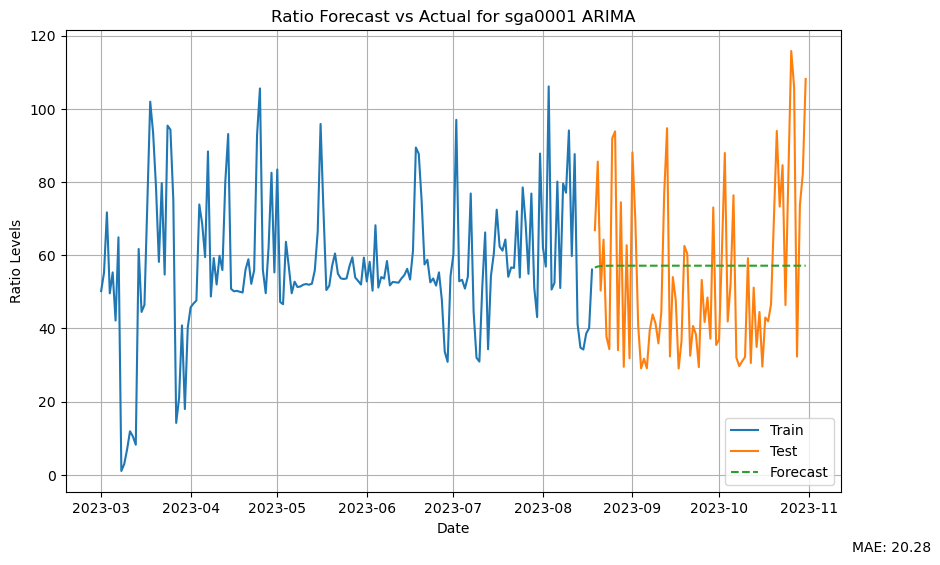

In [45]:
data_frames_test = {
    'test_ratio_fbo0023': test_ratio_fbo0023,
    'test_ratio_fsk0003': test_ratio_fsk0003,
    'test_ratio_fsk0005': test_ratio_fsk0005,
    'test_ratio_fsk0006': test_ratio_fsk0006,
    'test_ratio_fsk0007': test_ratio_fsk0007,
    'test_ratio_fsk0008': test_ratio_fsk0008,
    'test_ratio_mic0001': test_ratio_mic0001,
    'test_ratio_sbo0001': test_ratio_sbo0001,
    'test_ratio_sbo0002': test_ratio_sbo0002,
    'test_ratio_sbo0005': test_ratio_sbo0005,
    'test_ratio_sbo0007': test_ratio_sbo0007,
    'test_ratio_sbo0011': test_ratio_sbo0011,
    'test_ratio_sbo0012': test_ratio_sbo0012,
    'test_ratio_sbo0013': test_ratio_sbo0013,
    'test_ratio_sbo0014': test_ratio_sbo0014,
    'test_ratio_sbo0015': test_ratio_sbo0015,
    'test_ratio_sbo0016': test_ratio_sbo0016,
    'test_ratio_sbo0017': test_ratio_sbo0017,
    'test_ratio_sbo0028': test_ratio_sbo0028,
    'test_ratio_sbo0030': test_ratio_sbo0030,
    'test_ratio_sga0001': test_ratio_sga0001
}


data_frames_train = {
    'train_ratio_fbo0023': train_ratio_fbo0023,
    'train_ratio_fsk0003': train_ratio_fsk0003,
    'train_ratio_fsk0005': train_ratio_fsk0005,
    'train_ratio_fsk0006': train_ratio_fsk0006,
    'train_ratio_fsk0007': train_ratio_fsk0007,
    'train_ratio_fsk0008': train_ratio_fsk0008,
    'train_ratio_mic0001': train_ratio_mic0001,
    'train_ratio_sbo0001': train_ratio_sbo0001,
    'train_ratio_sbo0002': train_ratio_sbo0002,
    'train_ratio_sbo0005': train_ratio_sbo0005,
    'train_ratio_sbo0007': train_ratio_sbo0007,
    'train_ratio_sbo0011': train_ratio_sbo0011,
    'train_ratio_sbo0012': train_ratio_sbo0012,
    'train_ratio_sbo0013': train_ratio_sbo0013,
    'train_ratio_sbo0014': train_ratio_sbo0014,
    'train_ratio_sbo0015': train_ratio_sbo0015,
    'train_ratio_sbo0016': train_ratio_sbo0016,
    'train_ratio_sbo0017': train_ratio_sbo0017,
    'train_ratio_sbo0028': train_ratio_sbo0028,
    'train_ratio_sbo0030': train_ratio_sbo0030,
    'train_ratio_sga0001': train_ratio_sga0001,
}


def makemodel(df):
    auto_model = auto_arima(df['Ratio'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    print(auto_model.summary())
    p, d, q = auto_model.order
    print(p, d, q)

    model = ARIMA(df['Ratio'], order=(p, d, q))
    fitted_model = model.fit()
    #print(fitted_model.summary())
    return fitted_model

def forecast_models(data_frames_train, data_frames_test):
    forecasts = {}
    for key, df_train in data_frames_train.items():
        print(f"Processing {key}")
        print(df)
        model = makemodel(df_train)
        test_key = key.replace('train_', 'test_')
        if test_key in data_frames_test:
            print(f"Processing test {test_key}")

            df_test = data_frames_test[test_key]
            forecast = model.get_forecast(len(df_test))
            forecasts[test_key] = forecast.summary_frame()
            #print(forecast.summary_frame())
            plot(forecast.summary_frame()['mean'], df_train['Ratio'], df_test['Ratio'],test_key )
    return forecasts

def plot(forecast, train, test, key):
    identifier = key.split('_')[-1]  # Splits the key and takes the last part, which is the identifier

    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'Ratio Forecast vs Actual for {identifier} ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast - test))
    print('Mean Absolute Error (MAE):', np.round(MAE, 2))
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')  # Display MAE on the plot

    # Specify the filename and path where the plot should be saved
    save_path = f'Plot_ARIMA/forecast_plot_{identifier}.png'
    plt.savefig(save_path, format='png', dpi=300)  # Save the plot as a PNG file with high resolution

    plt.show()  # Display the plot

    return save_path  # Optionally return the path where the file was saved



# Run the forecasting function
forecast_results = forecast_models(data_frames_train, data_frames_test)

In [46]:
forecast_results

{'test_ratio_fbo0023': Ratio            mean    mean_se  mean_ci_lower  mean_ci_upper
 2023-08-19  80.253200  12.080064      56.576709     103.929692
 2023-08-20  80.534446  12.404959      56.221173     104.847719
 2023-08-21  83.221780  13.725831      56.319645     110.123915
 2023-08-22  83.133618  14.018777      55.657321     110.609915
 2023-08-23  83.930476  14.048604      56.395717     111.465234
 2023-08-24  84.024595  14.102176      56.384838     111.664352
 2023-08-25  83.815670  14.103007      56.174285     111.457056
 2023-08-26  83.838492  14.106132      56.190982     111.486003
 2023-08-27  83.595918  14.107938      55.944867     111.246969
 2023-08-28  83.535182  14.111473      55.877204     111.193160
 2023-08-29  83.467527  14.123910      55.785172     111.149882
 2023-08-30  83.422104  14.136295      55.715475     111.128732
 2023-08-31  83.434591  14.154586      55.692112     111.177070
 2023-09-01  83.430373  14.173345      55.651126     111.209619
 2023-09-02  83.44

In [47]:
#train_fbo0023

test_fbo0023

PlantKey       Ratio  SunRad  Temperature
ValueTime                                           
2023-08-19  FBO0023   97.229065  2340.0    19.900000
2023-08-20  FBO0023   80.846616   940.0    18.204167
2023-08-21  FBO0023   85.480387  3670.0    22.129167
2023-08-22  FBO0023   85.252788  2030.0    18.716667
2023-08-23  FBO0023   84.221885  4570.0    21.483333
2023-08-24  FBO0023   77.007237  5170.0    22.270833
2023-08-25  FBO0023   83.848191  1120.0    15.912500
2023-08-26  FBO0023  103.360453   840.0    18.116667
2023-08-27  FBO0023   87.278142  4610.0    21.775000
2023-08-28  FBO0023  100.546659  1440.0    15.929167
2023-08-29  FBO0023   90.409085  5500.0    21.170833
2023-08-30  FBO0023   77.607540  1480.0    16.829167
2023-08-31  FBO0023   77.730197  5770.0    21.837500
2023-09-01  FBO0023   96.042224   740.0    14.675000
2023-09-02  FBO0023   94.718512  1900.0    15.870833
2023-09-03  FBO0023   90.694064  3950.0    17.479167
2023-09-04  FBO0023   87.669861  5670.0    23.637500
2023-09-05  FBO0023   83.668607  5910.0    22.825000
2023-09-06  FBO0023   82.371296  6480.0    22.391667
2023-09-07  FBO0023   90.926666  4360.0    19.916667
2023-09-08  FBO0023   88.889390  3710.0    22.920833
2023-09-09  FBO0023   82.718394  4230.0    22.204167
2023-09-10  FBO0023   87.133688  4390.0    23.883333
2023-09-11  FBO0023   75.708590  3740.0    21.687500
2023-09-12  FBO0023   94.892333  1190.0    19.133333
2023-09-13  FBO0023   88.364100   530.0    15.237500
2023-09-14  FBO0023   77.126135  5630.0    17.595833
2023-09-15  FBO0023   93.262805  2950.0    17.062500
2023-09-16  FBO0023   77.602320  3800.0    18.879167
2023-09-17  FBO0023   79.377341  5070.0    18.683333
2023-09-18  FBO0023   90.923302  3060.0    14.470833
2023-09-19  FBO0023   63.250063  2350.0    17.525000
2023-09-20  FBO0023   74.635518  1990.0    17.329167
2023-09-21  FBO0023   87.040349  4500.0    20.700000
2023-09-22  FBO0023   88.016620  3130.0    19.245833
2023-09-23  FBO0023   83.794274  3570.0    18.287500
2023-09-24  FBO0023   82.216453  5370.0    16.675000
2023-09-25  FBO0023   82.438815  2550.0    14.583333
2023-09-26  FBO0023   70.037709  3430.0    17.575000
2023-09-27  FBO0023   83.589037  2000.0    17.275000
2023-09-28  FBO0023   83.407950  3720.0    18.512500
2023-09-29  FBO0023   71.636674  1600.0    16.287500
2023-09-30  FBO0023   77.122973  2920.0    16.150000
2023-10-01  FBO0023   82.861686  4410.0    16.295833
2023-10-02  FBO0023   83.359980  1100.0    12.420833
2023-10-03  FBO0023   81.503064   330.0    11.150000
2023-10-04  FBO0023   83.834803  3290.0    14.033333
2023-10-05  FBO0023   85.523341  1750.0     9.133333
2023-10-06  FBO0023   84.714759   740.0     8.166667
2023-10-07  FBO0023   79.968094  4500.0    10.887500
2023-10-08  FBO0023   85.084694  4970.0    10.687500
2023-10-09  FBO0023   80.586372  5020.0    10.616667
2023-10-10  FBO0023   78.426747  4750.0    10.345833
2023-10-11  FBO0023   93.197830   820.0    13.004167
2023-10-12  FBO0023   81.639167  4870.0    13.637500
2023-10-13  FBO0023   85.884575  2180.0     9.679167
2023-10-14  FBO0023   74.335230  3720.0    12.870833
2023-10-15  FBO0023   84.628755  3140.0    10.808333
2023-10-16  FBO0023   78.819725  4930.0     8.887500
2023-10-17  FBO0023  101.318593  1950.0     8.175000
2023-10-18  FBO0023   95.182530  2340.0     7.587500
2023-10-19  FBO0023   75.337272  2070.0     3.591667
2023-10-20  FBO0023   73.783352   660.0     4.362500
2023-10-21  FBO0023  119.309724   110.0     4.637500
2023-10-22  FBO0023   77.861586   340.0     6.933333
2023-10-23  FBO0023   80.932682   420.0     6.579167
2023-10-24  FBO0023   72.886222  2610.0     7.208333
2023-10-25  FBO0023  107.765153   260.0     3.633333
2023-10-26  FBO0023    0.000000     0.0     3.300000
2023-10-27  FBO0023  102.482770   100.0     2.962500
2023-10-28  FBO0023   89.425655  2350.0     4.850000
2023-10-29  FBO0023   82.671810  1050.0     3.466667
2023-10-30  FBO0023   79.229722   390.0     4.325000
2023-10-31  FBO0023  189.360263    3

In [48]:
train_fbo0023_var = train_fbo0023.drop('PlantKey', axis=1)

test_fbo0023_var = test_fbo0023.drop('PlantKey', axis=1)

In [49]:


#test_fbo0023_var


#test_fbo0023_var
# Assuming 'train_fbo0023_numeric' contains your data
# Calculate the first difference to make data stationary

#train_fbo0023_var['SunRad_diff'] = train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature_diff'] = train_fbo0023_var['Temperature'].diff()
#test_fbo0023_var['SunRad_diff'] = test_fbo0023_var['SunRad'].diff()
#test_fbo0023_var['Temperature_diff'] = test_fbo0023_var['Temperature'].diff()


#train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature'].diff()
#test_fbo0023_var['SunRad'].diff()
#test_fbo0023_var['Temperature'].diff()
#train_fbo0023_var['SunRad']= train_fbo0023_var['SunRad'].diff()
#train_fbo0023_var['Temperature']=train_fbo0023_var['Temperature'].diff()
# Drop the NaN values that come from differencing
train_fbo0023_var = train_fbo0023_var.dropna()
test_fbo0023_var= test_fbo0023_var.dropna()


In [50]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(train_fbo0023_var[['SunRad', 'Temperature']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0269  , p=0.0464  , df_denom=167, df_num=1
ssr based chi2 test:   chi2=4.0993  , p=0.0429  , df=1
likelihood ratio test: chi2=4.0506  , p=0.0442  , df=1
parameter F test:         F=4.0269  , p=0.0464  , df_denom=167, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4504  , p=0.2375  , df_denom=164, df_num=2
ssr based chi2 test:   chi2=2.9892  , p=0.2243  , df=2
likelihood ratio test: chi2=2.9631  , p=0.2273  , df=2
parameter F test:         F=1.4504  , p=0.2375  , df_denom=164, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9862  , p=0.4008  , df_denom=161, df_num=3
ssr based chi2 test:   chi2=3.0872  , p=0.3784  , df=3
likelihood ratio test: chi2=3.0592  , p=0.3826  , df=3
parameter F test:         F=0.9862  , p=0.4008  , df_denom=161, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7219  , p=0.5782  

In [51]:
train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}











from statsmodels.tsa.stattools import adfuller


# Function to perform the ADF test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {title}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")
    return result[1]

# Variables to test for stationarity
variables_to_test = ['Ratio', 'Temperature', 'SolarRadiation']

# Checking stationarity and differencing if needed
for key, df in train_data_dict.items():
    for variable in variables_to_test:
        if variable in df.columns:
            print(f"Testing stationarity for {variable} in {key}...")
            p_value = adf_test(df[variable], title=f"{variable} in {key}")

            if p_value > 0.05:
                print(f"Data for {variable} in {key} is non-stationary, differencing...")
                original_data = df[variable].copy()
                df[variable] = df[variable].diff()  # Differencing
                df.dropna(inplace=True)  # Drop NA values resulting from differencing
                if not df[variable].empty:  # Check if the DataFrame is not empty after dropping NaNs
                    p_value = adf_test(df[variable], title=f"{variable} in {key} after differencing")
                    print(f"New p-value for {variable} in {key} after differencing: {p_value}")
                else:
                    print(f"No data left for {variable} in {key} after differencing and dropping NaNs.")
          










Testing stationarity for Ratio in FBO0023...
ADF Statistic for Ratio in FBO0023: -5.380959043571548
p-value: 3.7134875074202514e-06
Data is stationary
Testing stationarity for Temperature in FBO0023...
ADF Statistic for Temperature in FBO0023: -1.837699089040766
p-value: 0.36191219491198795
Data is non-stationary
Data for Temperature in FBO0023 is non-stationary, differencing...
ADF Statistic for Temperature in FBO0023 after differencing: -7.246283653017469
p-value: 1.8286753261730665e-10
Data is stationary
New p-value for Temperature in FBO0023 after differencing: 1.8286753261730665e-10
Testing stationarity for Ratio in FSK0003...
ADF Statistic for Ratio in FSK0003: -3.022429791542096
p-value: 0.0328521724472415
Data is stationary
Testing stationarity for Temperature in FSK0003...
ADF Statistic for Temperature in FSK0003: -1.7881825988513305
p-value: 0.38634428740217813
Data is non-stationary
Data for Temperature in FSK0003 is non-stationary, differencing...
ADF Statistic for Temperat

In [52]:
from statsmodels.tsa.stattools import grangercausalitytests
train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}


train_data_dict

# Function to perform Granger causality test
def granger_test(dataframe, max_lags=2):
    variables = dataframe.columns
    results = {}
    for var1 in variables:
        for var2 in variables:
            if var1 != var2:
                test_result = grangercausalitytests(dataframe[[var1, var2]], maxlag=max_lags, verbose=False)
                p_values = [round(test_result[i + 1][0]['ssr_chi2test'][1], 4) for i in range(max_lags)]
                results[f'{var1} causes {var2}'] = p_values
    return results

# Apply Granger causality test on the datasets where stationarity has been checked
for key, df in train_data_dict.items():
    print(df)
    if set(variables_to_test).issubset(df.columns):  # Ensure all variables are in the DataFrame
        print(f"Performing Granger causality tests for dataset {key}...")
        granger_results = granger_test(df[variables_to_test])
        print(granger_results)



           PlantKey       Ratio  SunRad  Temperature
ValueTime                                           
2023-03-02  FBO0023   84.896073  3910.0    -0.800000
2023-03-03  FBO0023   92.794724  1820.0    -2.891667
2023-03-04  FBO0023   73.666501  3760.0    -2.550000
2023-03-05  FBO0023   77.158911  3440.0    -0.416667
2023-03-06  FBO0023   66.579521  1690.0    -3.962500
2023-03-07  FBO0023   85.800027  1940.0    -0.066667
2023-03-08        0    0.000000     0.0     2.120833
2023-03-09  FBO0023  117.307351   140.0    -2.783333
2023-03-10  FBO0023   50.280631  1640.0     1.162500
2023-03-11  FBO0023   61.809775  2130.0    -2.516667
2023-03-12  FBO0023   62.742578  5310.0     5.275000
2023-03-13  FBO0023   51.371054   590.0    -2.087500
2023-03-14  FBO0023   99.325153  1250.0     6.491667
2023-03-15  FBO0023   83.209343  6090.0    -0.120833
2023-03-16  FBO0023   82.298363  5990.0     0.691667
2023-03-17  FBO0023   88.244696  1430.0    -4.262500
2023-03-18  FBO0023   93.432331   280.0     1.

In [67]:
from statsmodels.tsa.api import VAR , VARMAX

train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}
best_lags = {}

for key, df in train_data_dict.items():
    #print(df.drop(["PlantKey"],axis=1))
    #print(df)
    df =df.drop(["PlantKey"],axis=1)
    #df =df.drop(["Temperature"],axis=1)



    #gc_results_sunrad = grangercausalitytests(df[['SunRad', 'Ratio']], maxlag=2)
    model= VAR(df)
    sorted_order= model.select_order(maxlags= 20)
    #print("With sunrad and ratio")
    print("With sunrad and ratio and temp")
    best_lag = sorted_order.aic
    best_lags[key] = best_lag
    print(best_lag)


print(f"For {key}, best AIC lag: {best_lag}")



#print(sorted_order.summary())
print(best_lags)


With sunrad and ratio and temp
1
With sunrad and ratio and temp
2
With sunrad and ratio and temp
1
With sunrad and ratio and temp
3
With sunrad and ratio and temp
1
With sunrad and ratio and temp
20
With sunrad and ratio and temp
1
With sunrad and ratio and temp
1
With sunrad and ratio and temp
1
With sunrad and ratio and temp
20
With sunrad and ratio and temp
18
With sunrad and ratio and temp
1
With sunrad and ratio and temp
1
With sunrad and ratio and temp
1
With sunrad and ratio and temp
1
With sunrad and ratio and temp
1
With sunrad and ratio and temp
1
With sunrad and ratio and temp
1
With sunrad and ratio and temp
2
With sunrad and ratio and temp
2
With sunrad and ratio and temp
1
For SGA0001, best AIC lag: 1
{'FBO0023': 1, 'FSK0003': 2, 'FSK0005': 1, 'FSK0006': 3, 'FSK0007': 1, 'FSK0008': 20, 'MIC0001': 1, 'SBO0001': 1, 'SBO0002': 1, 'SBO0005': 20, 'SBO0007': 18, 'SBO0011': 1, 'SBO0012': 1, 'SBO0013': 1, 'SBO0014': 1, 'SBO0015': 1, 'SBO0016': 1, 'SBO0017': 1, 'SBO0028': 2, 'SBO0

Processing FBO0023 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FBO0023
Mean Absolute Error (MAE): 9.06
Plot saved to Plots_VARMAX/forecast_plot_FBO0023.png


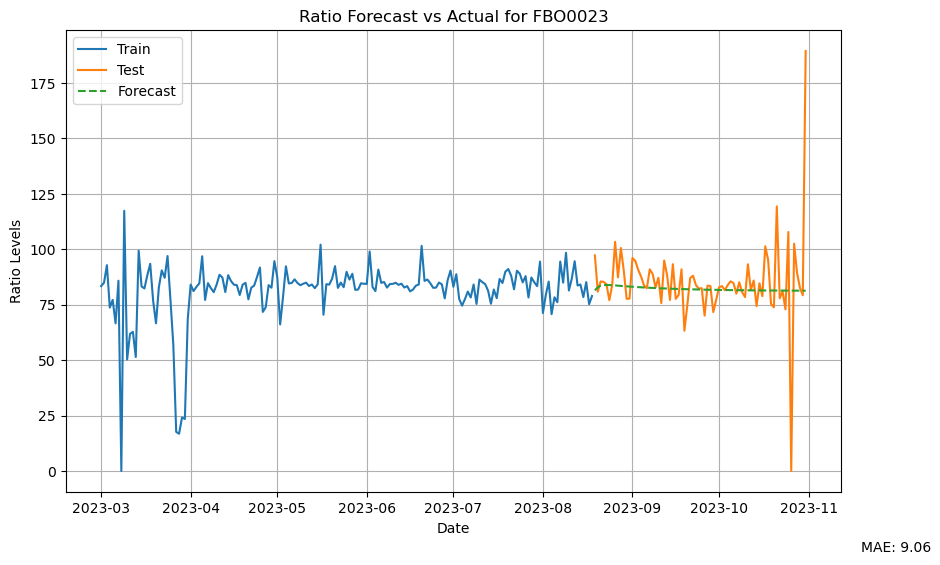

Processing FSK0003 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0003
Mean Absolute Error (MAE): 16.29
Plot saved to Plots_VARMAX/forecast_plot_FSK0003.png


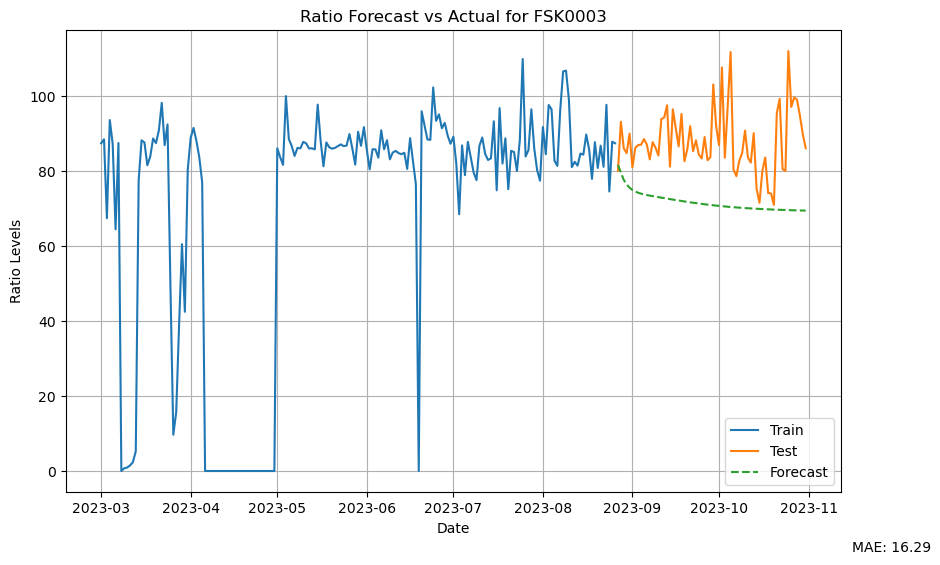

Processing FSK0005 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for FSK0005
Mean Absolute Error (MAE): 6.53
Plot saved to Plots_VARMAX/forecast_plot_FSK0005.png


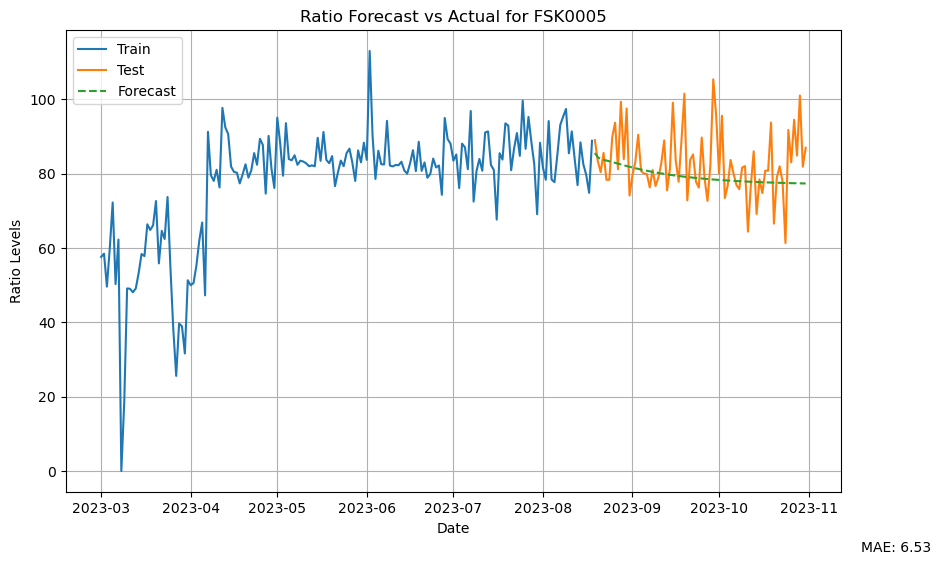

Processing FSK0006 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0006
Mean Absolute Error (MAE): 7.66
Plot saved to Plots_VARMAX/forecast_plot_FSK0006.png


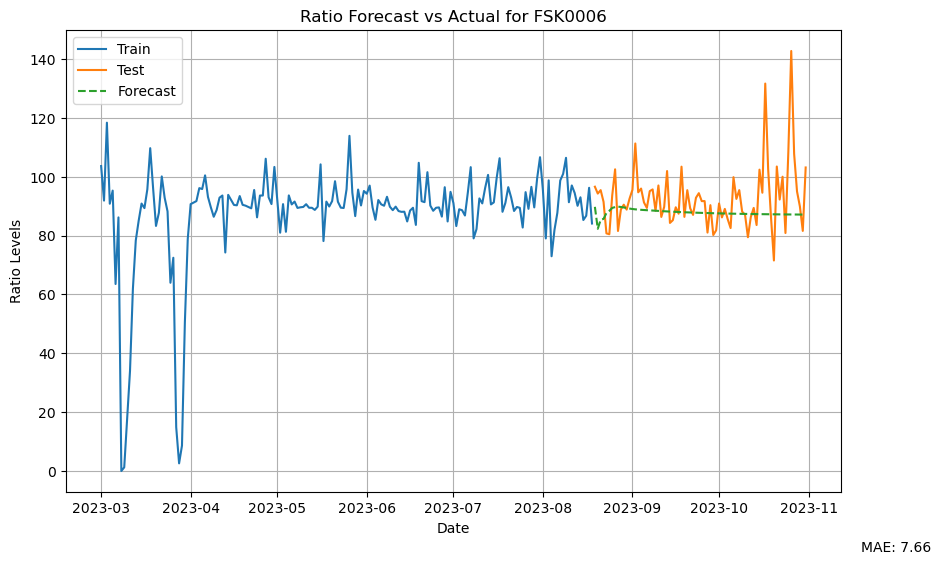

Processing FSK0007 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for FSK0007
Mean Absolute Error (MAE): 5.99
Plot saved to Plots_VARMAX/forecast_plot_FSK0007.png


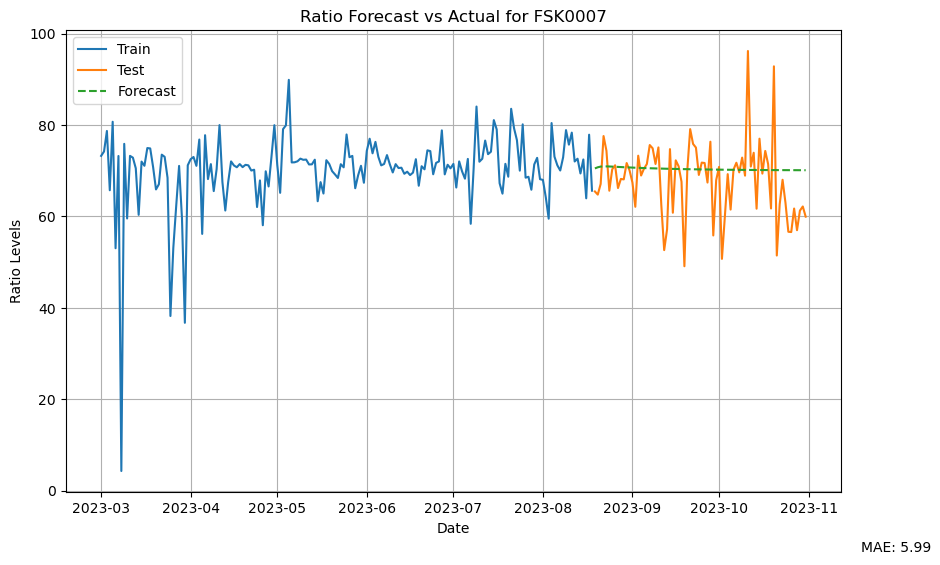

Processing FSK0008 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for FSK0008
Mean Absolute Error (MAE): 37.93
Plot saved to Plots_VARMAX/forecast_plot_FSK0008.png


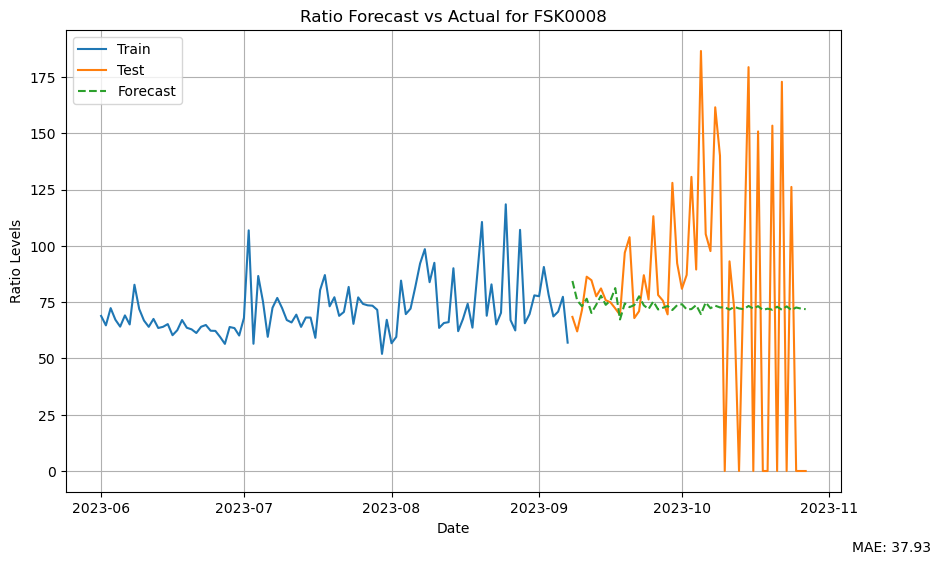

Processing MIC0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for MIC0001
Mean Absolute Error (MAE): 6.84
Plot saved to Plots_VARMAX/forecast_plot_MIC0001.png


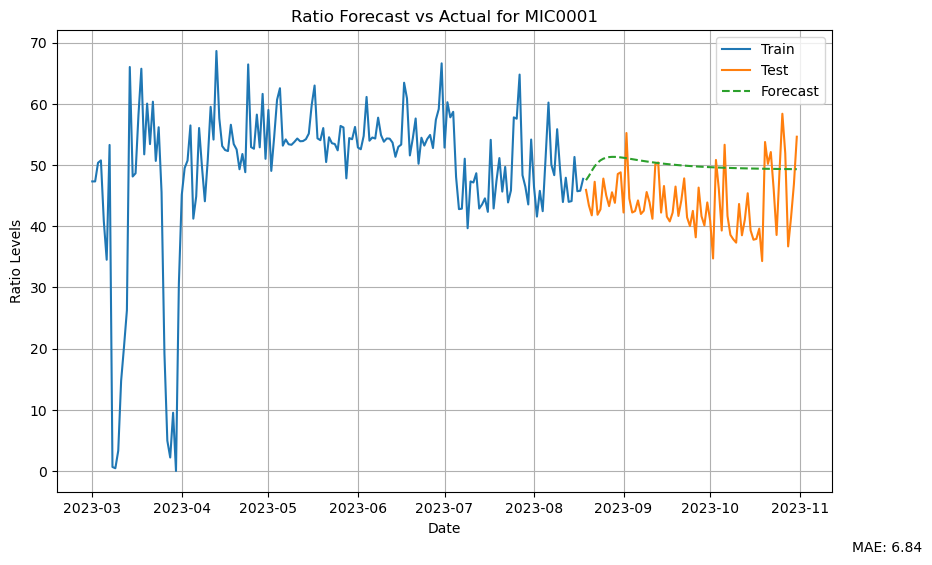

Processing SBO0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0001
Mean Absolute Error (MAE): 10.48
Plot saved to Plots_VARMAX/forecast_plot_SBO0001.png


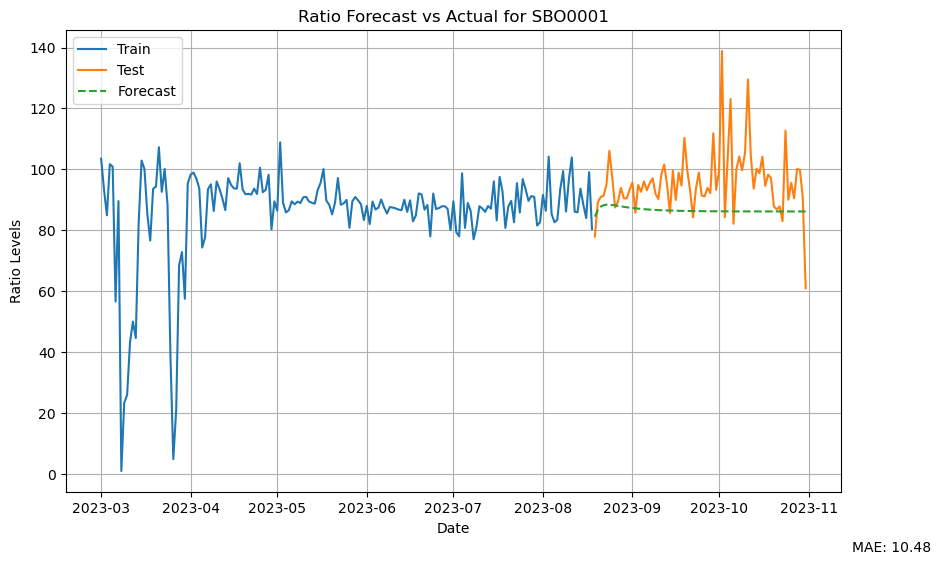

Processing SBO0002 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0002
Mean Absolute Error (MAE): 7.74
Plot saved to Plots_VARMAX/forecast_plot_SBO0002.png


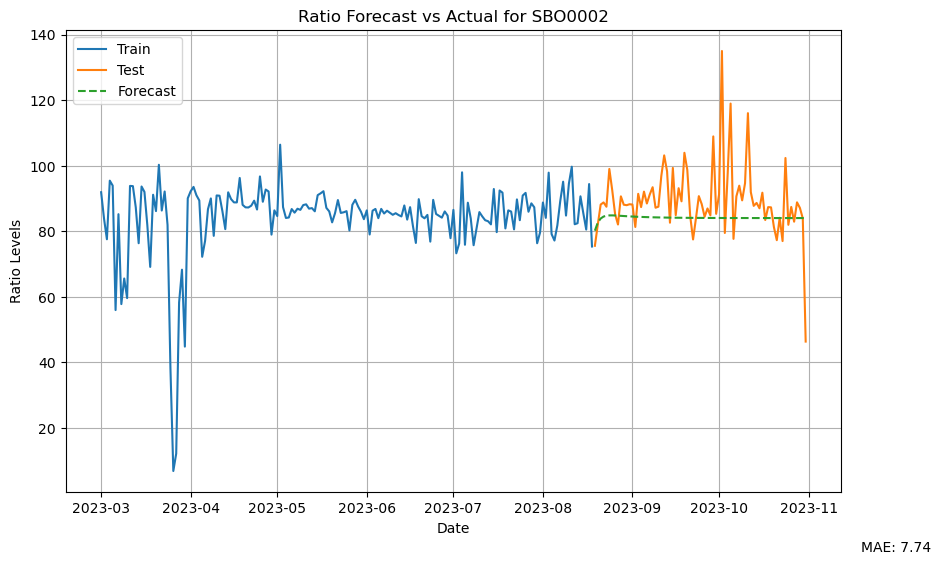

Processing SBO0005 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0005
Mean Absolute Error (MAE): 32.34
Plot saved to Plots_VARMAX/forecast_plot_SBO0005.png


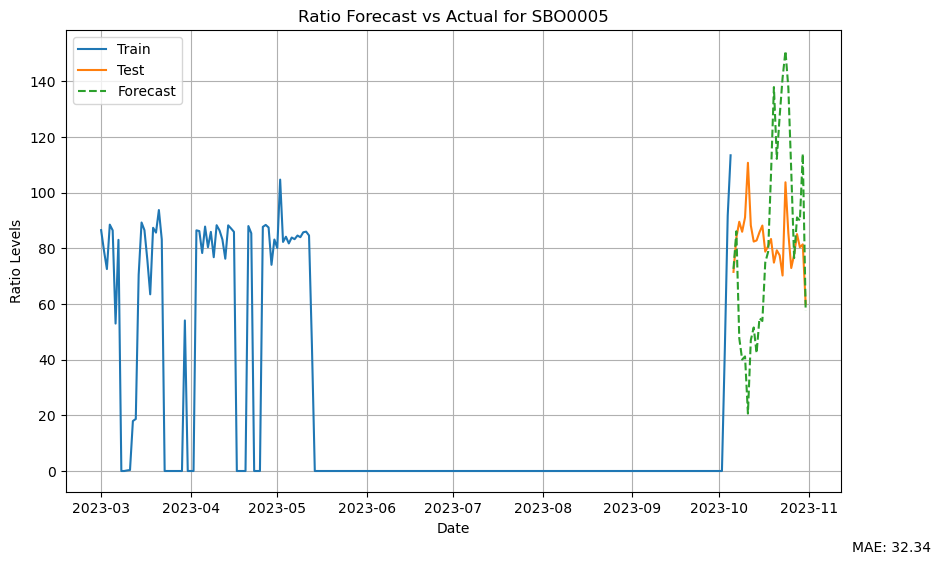

Processing SBO0007 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0007
Mean Absolute Error (MAE): 12.88
Plot saved to Plots_VARMAX/forecast_plot_SBO0007.png


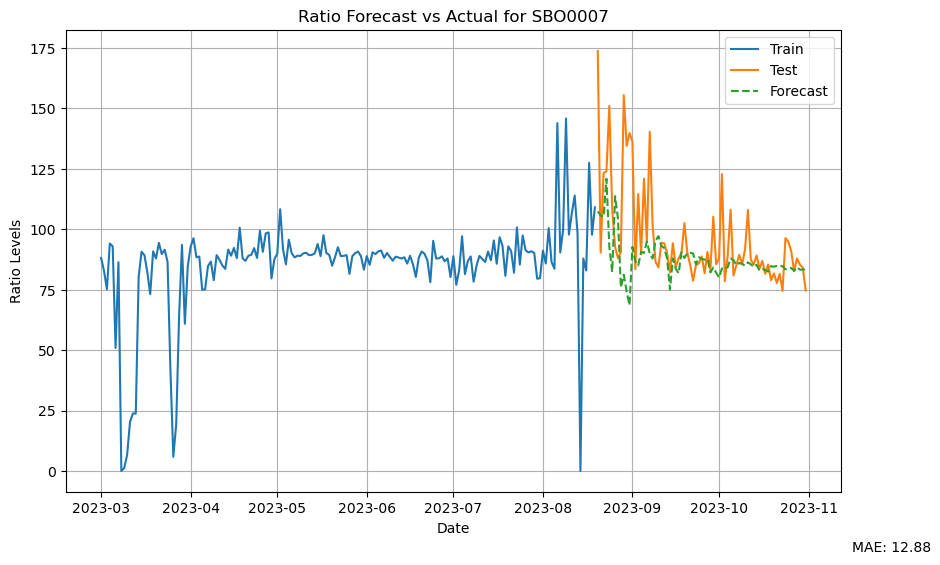

Processing SBO0011 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0011
Mean Absolute Error (MAE): 4.66
Plot saved to Plots_VARMAX/forecast_plot_SBO0011.png


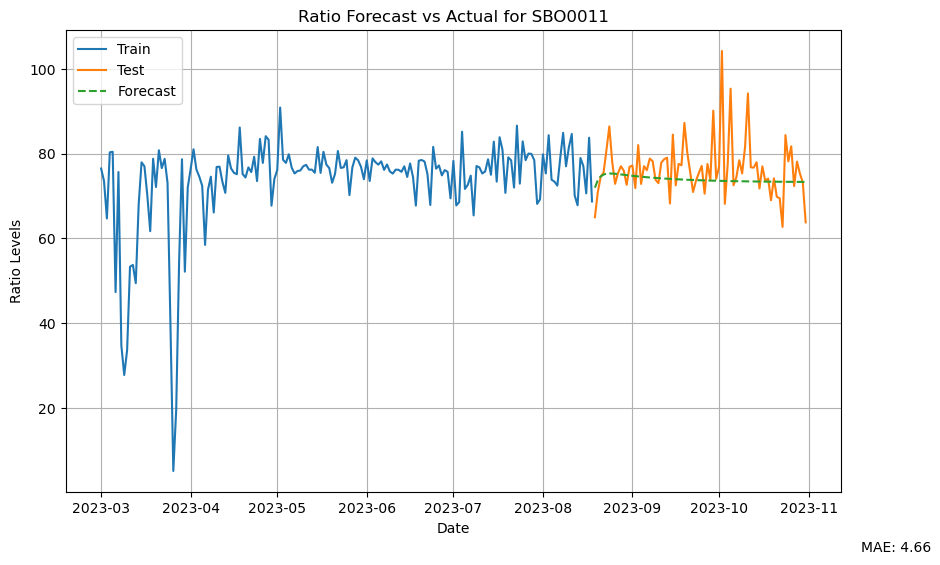

Processing SBO0012 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0012
Mean Absolute Error (MAE): 8.81
Plot saved to Plots_VARMAX/forecast_plot_SBO0012.png


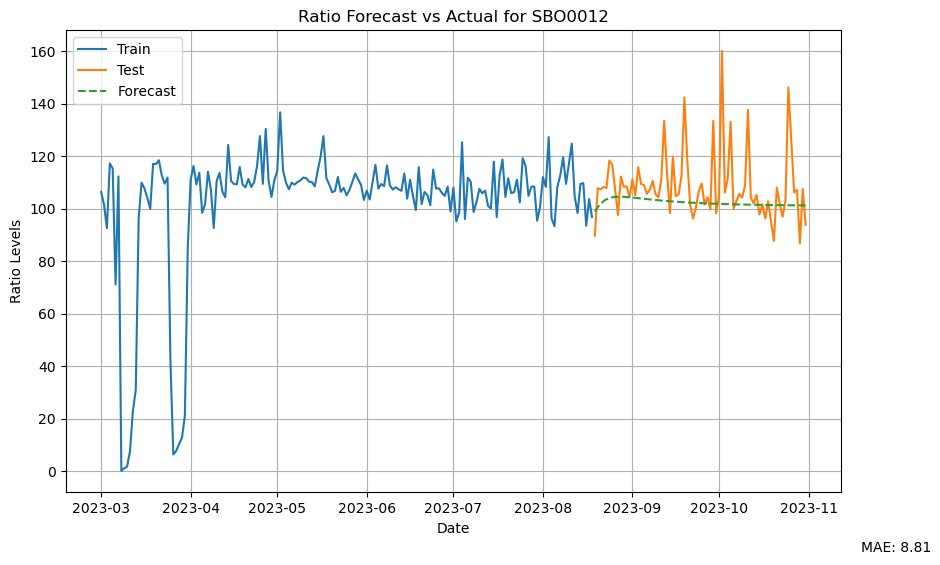

Processing SBO0013 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0013
Mean Absolute Error (MAE): 7.13
Plot saved to Plots_VARMAX/forecast_plot_SBO0013.png


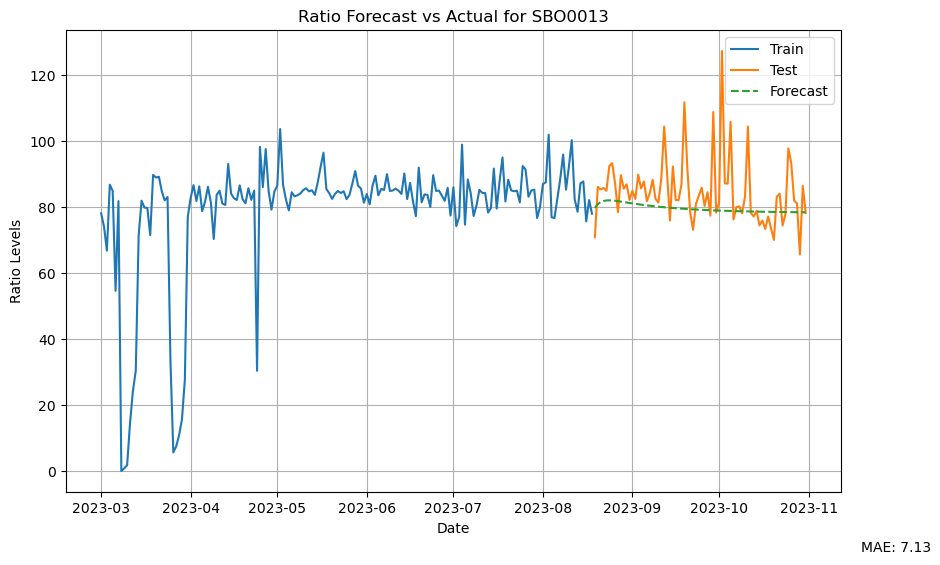

Processing SBO0014 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0014
Mean Absolute Error (MAE): 16.31
Plot saved to Plots_VARMAX/forecast_plot_SBO0014.png


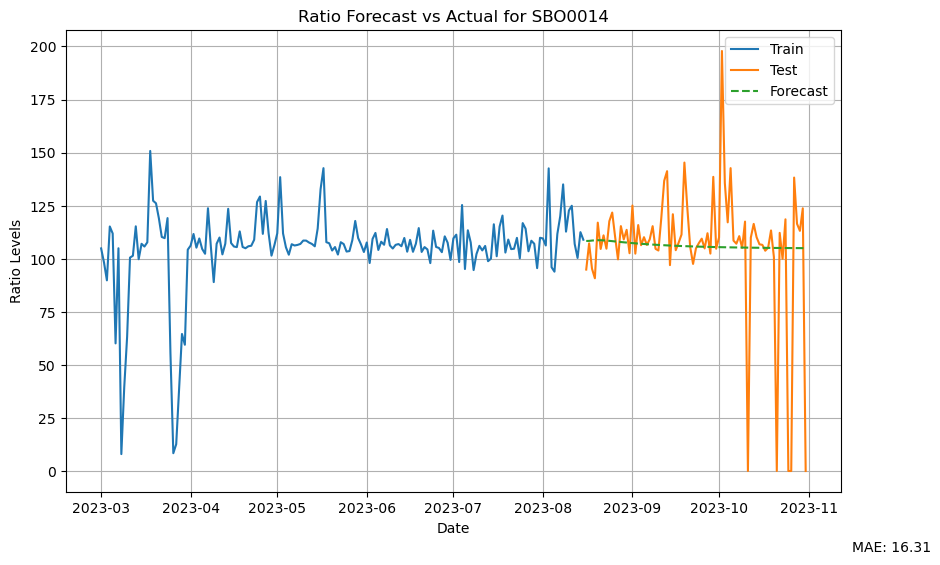

Processing SBO0015 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0015
Mean Absolute Error (MAE): 6.27
Plot saved to Plots_VARMAX/forecast_plot_SBO0015.png


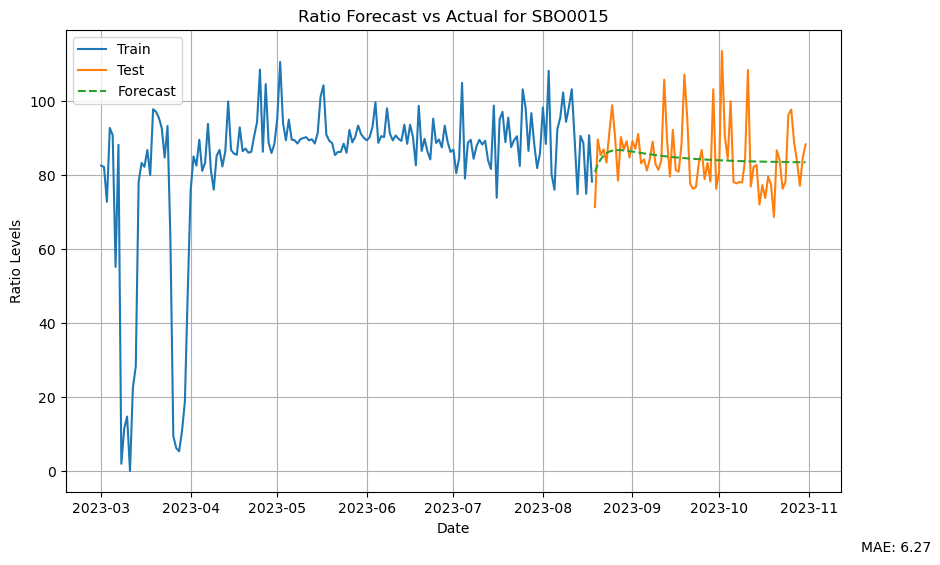

Processing SBO0016 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0016
Mean Absolute Error (MAE): 15.73
Plot saved to Plots_VARMAX/forecast_plot_SBO0016.png


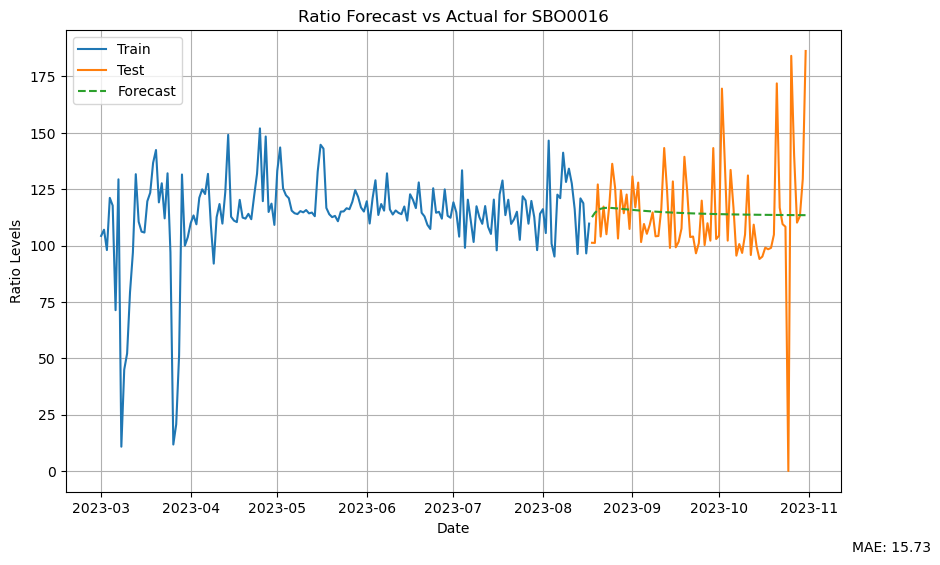

Processing SBO0017 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


Forecasting test data for SBO0017
Mean Absolute Error (MAE): 12.87
Plot saved to Plots_VARMAX/forecast_plot_SBO0017.png


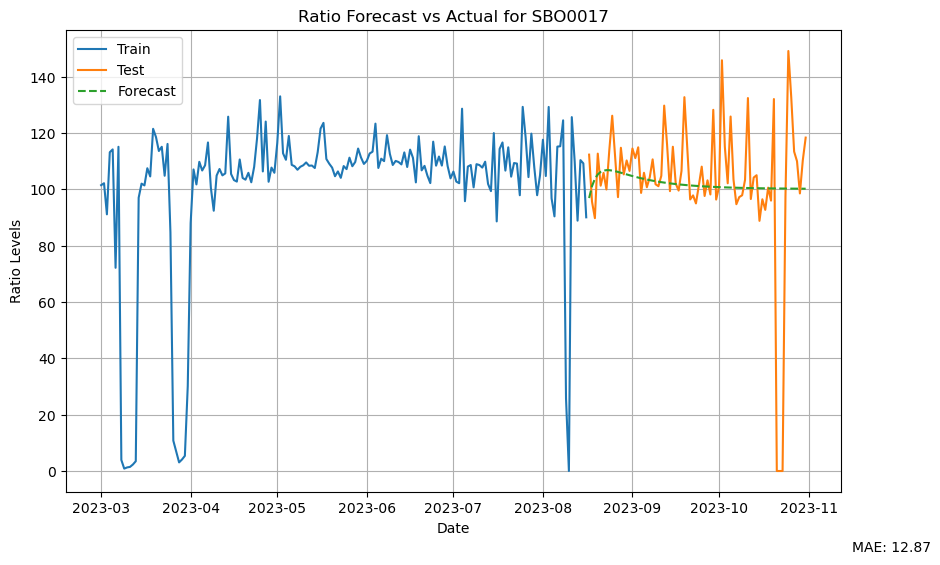

Processing SBO0028 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0028
Mean Absolute Error (MAE): 14.78
Plot saved to Plots_VARMAX/forecast_plot_SBO0028.png


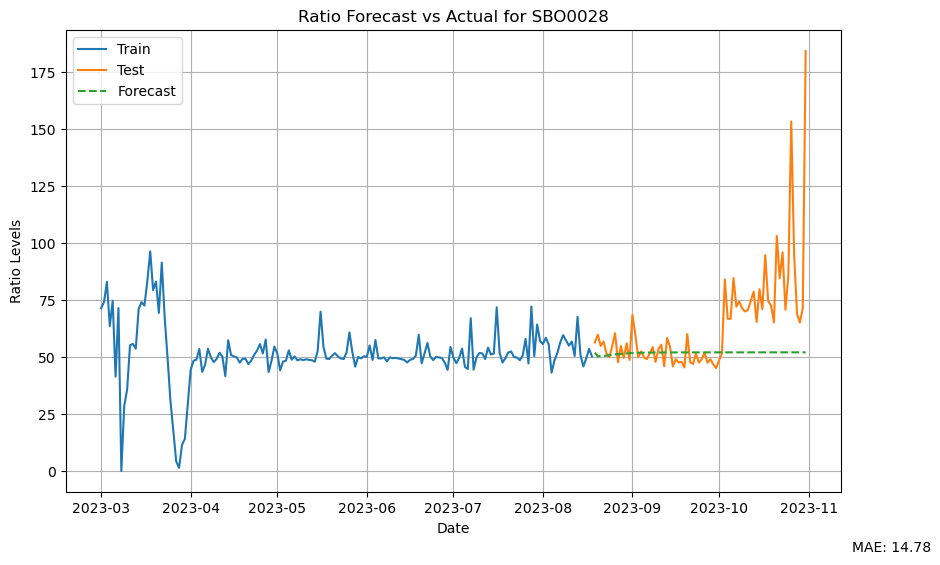

Processing SBO0030 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SBO0030
Mean Absolute Error (MAE): 8.76
Plot saved to Plots_VARMAX/forecast_plot_SBO0030.png


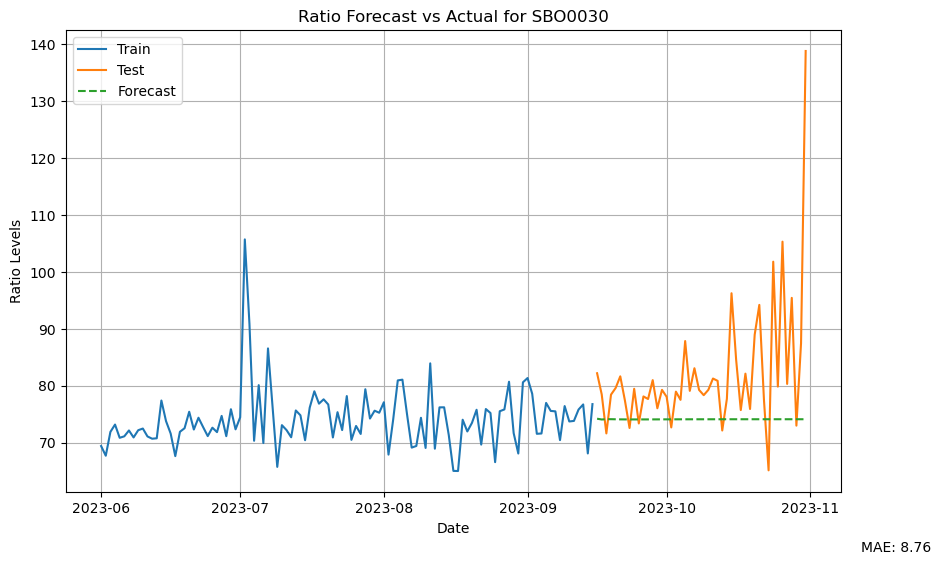

Processing SGA0001 with data types:
PlantKey        object
Ratio          float64
SunRad         float64
Temperature    float64
dtype: object


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasting test data for SGA0001
Mean Absolute Error (MAE): 20.36
Plot saved to Plots_VARMAX/forecast_plot_SGA0001.png


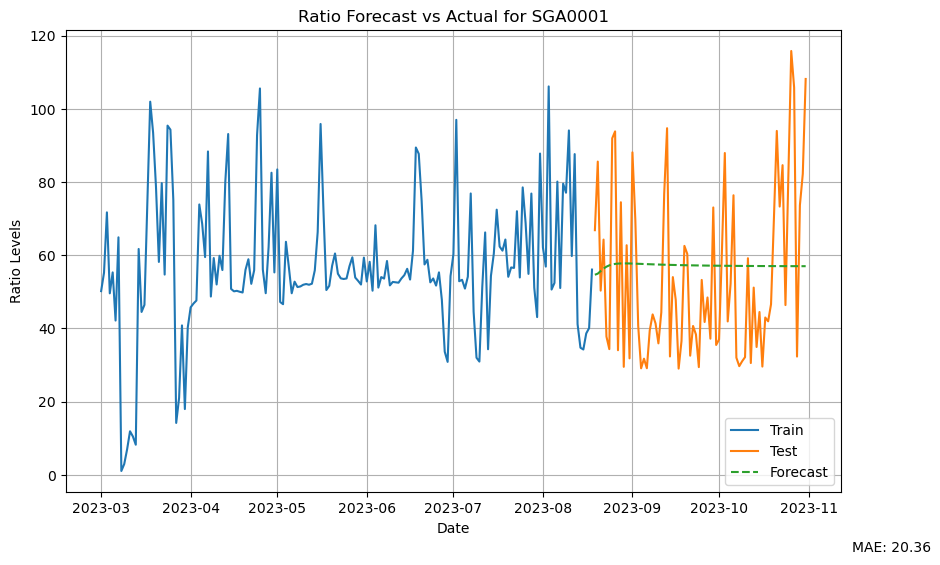

In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX

test_data_dict = {
    "FBO0023": test_fbo0023,
    "FSK0003": test_fsk0003,
    "FSK0005": test_fsk0005,
    "FSK0006": test_fsk0006,
    "FSK0007": test_fsk0007,
    "FSK0008": test_fsk0008,
    "MIC0001": test_mic0001,
    "SBO0001": test_sbo0001,
    "SBO0002": test_sbo0002,
    "SBO0005": test_sbo0005,
    "SBO0007": test_sbo0007,
    "SBO0011": test_sbo0011,
    "SBO0012": test_sbo0012,
    "SBO0013": test_sbo0013,
    "SBO0014": test_sbo0014,
    "SBO0015": test_sbo0015,
    "SBO0016": test_sbo0016,
    "SBO0017": test_sbo0017,
    "SBO0028": test_sbo0028,
    "SBO0030": test_sbo0030,
    "SGA0001": test_sga0001
}

train_data_dict = {
    "FBO0023": train_fbo0023,
    "FSK0003": train_fsk0003,
    "FSK0005": train_fsk0005,
    "FSK0006": train_fsk0006,
    "FSK0007": train_fsk0007,
    "FSK0008": train_fsk0008,
    "MIC0001": train_mic0001,
    "SBO0001": train_sbo0001,
    "SBO0002": train_sbo0002,
    "SBO0005": train_sbo0005,
    "SBO0007": train_sbo0007,
    "SBO0011": train_sbo0011,
    "SBO0012": train_sbo0012,
    "SBO0013": train_sbo0013,
    "SBO0014": train_sbo0014,
    "SBO0015": train_sbo0015,
    "SBO0016": train_sbo0016,
    "SBO0017": train_sbo0017,
    "SBO0028": train_sbo0028,
    "SBO0030": train_sbo0030,
    "SGA0001": train_sga0001
}



# Directory setup for saving plots
var_save_dir = "Plots_VARMAX"
os.makedirs(var_save_dir, exist_ok=True)

arima_save_dir = "Plots_ARIMA"
os.makedirs(arima_save_dir, exist_ok=True)

def makemodel(df, lag):
    """
    Fit a VARMAX model given dataframe and lag order.
    """
    try:
        model_var = VARMAX(df, order=(lag, 0), enforce_stationarity=True)
        fitted_model_var = model_var.fit(disp=False)
        return fitted_model_var
    except Exception as e:
        print(f"An error occurred while fitting the model: {e}")
        return None

def forecast_models(data_frames_train, data_frames_test, best_lags):
    """
    Process each key in training data, fit model, and forecast based on the test data.
    """
    forecasts = {}
    for key, df_train in data_frames_train.items():
        print(f"Processing {key} with data types:\n{df_train.dtypes}")
        lag = best_lags.get(key, 1)  # Default to lag 1 if not specified
        df_train = df_train.drop(["PlantKey"], axis=1, errors='ignore')
        model = makemodel(df_train, lag)
        if model and key in data_frames_test:
            df_test = data_frames_test[key]
            print(f"Forecasting test data for {key}")
            forecast = model.get_forecast(steps=len(df_test))
            forecasts[key] = forecast.summary_frame()
            plot_forecast(df_train['Ratio'], df_test['Ratio'], forecast.summary_frame()['mean'], key, var_save_dir)
    return forecasts

def plot_forecast(train, test, forecast, key, save_dir, show=True, save=True):
    """
    Plot training, test, and forecast data for visual analysis, save and/or show the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'Ratio Forecast vs Actual for {key}')
    plt.xlabel('Date')
    plt.ylabel('Ratio Levels')
    plt.legend()
    plt.grid(True)

    MAE = np.mean(np.abs(forecast - test))
    print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')
    plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

    if save:
        save_path = f'{save_dir}/forecast_plot_{key}.png'
        plt.savefig(save_path, format='png', dpi=300)
        print(f"Plot saved to {save_path}")

    if show:
        plt.show()
    plt.close()

# Define lags for VARMAX modeling
forecast_results = forecast_models(train_data_dict, test_data_dict, best_lags)


In [55]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(train_fbo0023_var[['SunRad', 'Temperature']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0269  , p=0.0464  , df_denom=167, df_num=1
ssr based chi2 test:   chi2=4.0993  , p=0.0429  , df=1
likelihood ratio test: chi2=4.0506  , p=0.0442  , df=1
parameter F test:         F=4.0269  , p=0.0464  , df_denom=167, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4504  , p=0.2375  , df_denom=164, df_num=2
ssr based chi2 test:   chi2=2.9892  , p=0.2243  , df=2
likelihood ratio test: chi2=2.9631  , p=0.2273  , df=2
parameter F test:         F=1.4504  , p=0.2375  , df_denom=164, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9862  , p=0.4008  , df_denom=161, df_num=3
ssr based chi2 test:   chi2=3.0872  , p=0.3784  , df=3
likelihood ratio test: chi2=3.0592  , p=0.3826  , df=3
parameter F test:         F=0.9862  , p=0.4008  , df_denom=161, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7219  , p=0.5782  

In [56]:
train_mic0001

PlantKey      Ratio  SunRad  Temperature
ValueTime                                          
2023-03-03  MIC0001   3.047040  1680.0    -2.283333
2023-03-04  MIC0001   0.389885  2590.0    -3.970833
2023-03-05  MIC0001  -9.917039  3190.0     0.058333
2023-03-06  MIC0001  -6.318694  1450.0    -3.491667
2023-03-07  MIC0001  18.760181  1680.0     2.012500
2023-03-08  MIC0001 -52.616376   320.0    -1.366667
2023-03-09  MIC0001  -0.207062  2800.0    -0.345833
2023-03-10  MIC0001   2.860919  1940.0     2.737500
2023-03-11  MIC0001  11.423385  2170.0    -2.525000
2023-03-12  MIC0001   5.585637  4640.0     2.429167
2023-03-13  MIC0001   5.944449   610.0    -0.012500
2023-03-14  MIC0001  39.744806   950.0     5.383333
2023-03-15  MIC0001 -17.890951  4990.0    -1.462500
2023-03-16  MIC0001   0.524270  4910.0     2.108333
2023-03-17  MIC0001   9.506291  1300.0    -2.616667
2023-03-18  MIC0001   7.577134   390.0     0.929167
2023-03-19  MIC0001 -13.989172  1270.0     3.070833
2023-03-20  MIC0001   8.292932   680.0    -2.350000
2023-03-21  MIC0001  -6.618722  3280.0     1.754167
2023-03-22  MIC0001   6.933627  1000.0     0.562500
2023-03-23  MIC0001  -9.681637  4420.0     3.879167
2023-03-24  MIC0001   5.504809   860.0    -3.341667
2023-03-25  MIC0001 -10.636509   500.0    -6.933333
2023-03-26  MIC0001 -26.365775  1060.0    -1.070833
2023-03-27  MIC0001 -14.210685  1150.0    -2.629167
2023-03-28  MIC0001  -2.747704  2310.0     0.008333
2023-03-29  MIC0001   7.318176  1050.0     0.408333
2023-03-30        0  -9.525264     0.0     2.150000
2023-03-31  MIC0001  30.668762  3820.0     4.433333
2023-04-01  MIC0001  14.453909  5760.0     1.441667
2023-04-02  MIC0001   4.376373  5800.0    -0.666667
2023-04-03  MIC0001   1.228267  5830.0     0.175000
2023-04-04  MIC0001   5.735118  2130.0    -2.258333
2023-04-05  MIC0001 -15.231657  1000.0    -2.695833
2023-04-06  MIC0001   3.630278  2630.0     7.741667
2023-04-07  MIC0001  11.180151   840.0    -4.070833
2023-04-08  MIC0001  -6.367217  6060.0    10.191667
2023-04-09  MIC0001  -5.604830  4590.0    -2.087500
2023-04-10  MIC0001   6.759536  5710.0     0.825000
2023-04-11  MIC0001   8.670502  3860.0    -1.270833
2023-04-12  MIC0001  -5.350168  4870.0     4.433333
2023-04-13  MIC0001  14.474354   860.0    -8.054167
2023-04-14  MIC0001 -10.996527  1040.0    -1.616667
2023-04-15  MIC0001  -4.533080  5970.0     7.125000
2023-04-16  MIC0001  -0.648268  6040.0    -0.558333
2023-04-17  MIC0001  -0.170977  6100.0     1.362500
2023-04-18  MIC0001   4.298760  5620.0    -1.000000
2023-04-19  MIC0001  -3.156166  6120.0     1.779167
2023-04-20  MIC0001  -0.883839  5570.0     1.920833
2023-04-21  MIC0001  -3.231564  5990.0     2.391667
2023-04-22  MIC0001   2.497458  6170.0    -0.150000
2023-04-23  MIC0001  -2.978043  5020.0    -3.133333
2023-04-24  MIC0001  17.610154   790.0    -8.837500
2023-04-25  MIC0001 -13.510497  1450.0     2.458333
2023-04-26  MIC0001  -0.268044  3890.0     0.912500
2023-04-27  MIC0001   5.580133  3900.0    -1.779167
2023-04-28  MIC0001  -5.350589  3900.0     0.654167
2023-04-29  MIC0001   8.733579  1950.0    -1.395833
2023-04-30  MIC0001 -10.609980  5490.0     2.579167
2023-05-01  MIC0001   7.981740  2040.0    -1.687500
2023-05-02  MIC0001  -9.954730  4640.0     1.237500
2023-05-03  MIC0001   5.541816  4530.0     0.658333
2023-05-04  MIC0001   6.069713  4140.0    -2.158333
2023-05-05  MIC0001   1.893620  3450.0    -0.533333
2023-05-06  MIC0001  -9.379960  6630.0     3.687500
2023-05-07  MIC0001   1.015320  6340.0     1.487500
2023-05-08  MIC0001  -0.788848  6620.0     2.883333
2023-05-09  MIC0001  -0.086087  6720.0     0.229167
2023-05-10  MIC0001   0.468419  6690.0     1.079167
2023-05-11  MIC0001   0.555041  6540.0     1.404167
2023-05-12  MIC0001  -0.447716  6620.0     2.041667
2023-05-13  MIC0001   0.037786  6650.0     0.579167
2023-05-14  MIC0001   0.308839  6400.0     1.537500
2023-05-15  MIC0001   0.905635  3810.0    -1.745833
2023-05-16  MIC0001   4.682621   960.0    -6.783333
2023-05

In [57]:
print(train_fbo0023_var)

                 Ratio  SunRad  Temperature
ValueTime                                  
2023-03-01   83.366332  4530.0     8.566667
2023-03-02   84.896073  3910.0     7.766667
2023-03-03   92.794724  1820.0     4.875000
2023-03-04   73.666501  3760.0     2.325000
2023-03-05   77.158911  3440.0     1.908333
2023-03-06   66.579521  1690.0    -2.054167
2023-03-07   85.800027  1940.0    -2.120833
2023-03-08    0.000000     0.0     0.000000
2023-03-09  117.307351   140.0    -2.783333
2023-03-10   50.280631  1640.0    -1.620833
2023-03-11   61.809775  2130.0    -4.137500
2023-03-12   62.742578  5310.0     1.137500
2023-03-13   51.371054   590.0    -0.950000
2023-03-14   99.325153  1250.0     5.541667
2023-03-15   83.209343  6090.0     5.420833
2023-03-16   82.298363  5990.0     6.112500
2023-03-17   88.244696  1430.0     1.850000
2023-03-18   93.432331   280.0     3.737500
2023-03-19   76.915671   930.0     5.720833
2023-03-20   66.585534   830.0     4.429167
2023-03-21   82.889189  3740.0  

In [58]:
# Check for stationarity and difference if necessary
def check_stationarity(ts):
    result = adfuller(ts, autolag='AIC')
    if result[1] < 0.05:
        print('Series is stationary')
    else:
        print('Series is not stationary')

# Apply to all series
#for col in train_fbo0023_var.columns:
check_stationarity(combined_train["SunRad"])
check_stationarity(combined_train["Temperature"])

print(train_fbo0023_var)

#combined_train, combined_test
#train_fbo0023.dtypes

Series is stationary
Series is not stationary
                 Ratio  SunRad  Temperature
ValueTime                                  
2023-03-01   83.366332  4530.0     8.566667
2023-03-02   84.896073  3910.0     7.766667
2023-03-03   92.794724  1820.0     4.875000
2023-03-04   73.666501  3760.0     2.325000
2023-03-05   77.158911  3440.0     1.908333
2023-03-06   66.579521  1690.0    -2.054167
2023-03-07   85.800027  1940.0    -2.120833
2023-03-08    0.000000     0.0     0.000000
2023-03-09  117.307351   140.0    -2.783333
2023-03-10   50.280631  1640.0    -1.620833
2023-03-11   61.809775  2130.0    -4.137500
2023-03-12   62.742578  5310.0     1.137500
2023-03-13   51.371054   590.0    -0.950000
2023-03-14   99.325153  1250.0     5.541667
2023-03-15   83.209343  6090.0     5.420833
2023-03-16   82.298363  5990.0     6.112500
2023-03-17   88.244696  1430.0     1.850000
2023-03-18   93.432331   280.0     3.737500
2023-03-19   76.915671   930.0     5.720833
2023-03-20   66.585534   830.0

In [59]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_results = grangercausalitytests(combined_train[['SunRad', 'Temperature']], maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2001  , p=0.0239  , df_denom=167, df_num=1
ssr based chi2 test:   chi2=5.2935  , p=0.0214  , df=1
likelihood ratio test: chi2=5.2127  , p=0.0224  , df=1
parameter F test:         F=5.2001  , p=0.0239  , df_denom=167, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6250  , p=0.2001  , df_denom=164, df_num=2
ssr based chi2 test:   chi2=3.3490  , p=0.1874  , df=2
likelihood ratio test: chi2=3.3163  , p=0.1905  , df=2
parameter F test:         F=1.6250  , p=0.2001  , df_denom=164, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7714  , p=0.5116  , df_denom=161, df_num=3
ssr based chi2 test:   chi2=2.4149  , p=0.4909  , df=3
likelihood ratio test: chi2=2.3977  , p=0.4941  , df=3
parameter F test:         F=0.7714  , p=0.5116  , df_denom=161, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8656  , p=0.4860  

In [60]:
model_COMB= VAR(combined_train)
sorted_order= model_COMB.select_order(maxlags= 20)
best_lag_COMB = sorted_order.aic

print(best_lag_COMB)

1


In [61]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR , VARMAX
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

#print(df.drop(["PlantKey"],axis=1))
#print(df)
#df =df.drop(["PlantKey"],axis=1)
#df =df.drop(["Temperature"],axis=1)



#gc_results_sunrad = grangercausalitytests(df[['SunRad', 'Ratio']], maxlag=2)



model_combine = VARMAX(combined_train, order=(best_lag_COMB,0), enforce_stationarity= True)
fitted_model_combine = model_combine.fit(disp= False)
print(fitted_model_combine.summary())


C:\Users\nikla\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


                                   Statespace Model Results                                   
Dep. Variable:     ['Ratio', 'SunRad', 'Temperature']   No. Observations:                  171
Model:                                         VAR(1)   Log Likelihood               -2482.170
                                          + intercept   AIC                           5000.341
Date:                                Fri, 10 May 2024   BIC                           5056.891
Time:                                        10:20:57   HQIC                          5023.287
Sample:                                    03-01-2023                                         
                                         - 08-18-2023                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):       1.94, 0.19, 0.09   Jarque-Bera (JB):   3465.25, 7.67, 1.91
Prob(Q):                  0.16, 0.66, 0.76   Prob(JB):      

In [62]:

start_forecast = combined_test.index[0]
end_forecast = combined_test.index[-1]
predictions = fitted_model_combine.get_prediction(start=start_forecast, end=end_forecast)
forecast_mean_VAR = predictions.predicted_mean
combined_train
forecast_mean_VAR

Ratio       SunRad  Temperature
2023-08-19  79.056177  3969.284089    20.656808
2023-08-20  80.225858  4309.446844    20.515495
2023-08-21  81.142504  4488.039384    20.317123
2023-08-22  81.812989  4580.033748    20.100848
2023-08-23  82.277024  4625.062873    19.884581
2023-08-24  82.580146  4644.307328    19.675955
2023-08-25  82.763218  4649.238468    19.477745
2023-08-26  82.859372  4646.168260    19.290531
2023-08-27  82.894064  4638.632798    19.113969
2023-08-28  82.886221  4628.651829    18.947382
2023-08-29  82.849612  4617.401723    18.790025
2023-08-30  82.794107  4605.580037    18.641194
2023-08-31  82.726691  4593.606330    18.500254
2023-09-01  82.652261  4581.734969    18.366648
2023-09-02  82.574216  4570.119919    18.239891
2023-09-03  82.494888  4558.852828    18.119551
2023-09-04  82.415859  4547.985993    18.005245
2023-09-05  82.338180  4537.546512    17.896630
2023-09-06  82.262535  4527.545224    17.793393
2023-09-07  82.189349  4517.982445    17.695245
2023-09-08  82.118871  4508.851719    17.601922
2023-09-09  82.051226  4500.142301    17.513175
2023-09-10  81.986457  4491.840807    17.428773
2023-09-11  81.924549  4483.932325    17.348498
2023-09-12  81.865452  4476.401164    17.272143
2023-09-13  81.809090  4469.231348    17.199516
2023-09-14  81.755374  4462.406952    17.130432
2023-09-15  81.704204  4455.912319    17.064718
2023-09-16  81.655478  4449.732203    17.002207
2023-09-17  81.609092  4443.851853    16.942744
2023-09-18  81.564941  4438.257063    16.886179
2023-09-19  81.522925  4432.934201    16.832371
2023-09-20  81.482944  4427.870214    16.781184
2023-09-21  81.444902  4423.052626    16.732492
2023-09-22  81.408708  4418.469529    16.686173
2023-09-23  81.374273  4414.109564    16.642110
2023-09-24  81.341514  4409.961908    16.600195
2023-09-25  81.310348  4406.016249    16.560321
2023-09-26  81.280699  4402.262769    16.522390
2023-09-27  81.252494  4398.692121    16.486308
2023-09-28  81.225663  4395.295409    16.451983
2023-09-29  81.200138  4392.064166    16.419331
2023-09-30  81.175856  4388.990336    16.388269
2023-10-01  81.152757  4386.066255    16.358721
2023-10-02  81.130783  4383.284627    16.330612
2023-10-03  81.109880  4380.638517    16.303873
2023-10-04  81.089995  4378.121321    16.278436
2023-10-05  81.071079  4375.726761    16.254239
2023-10-06  81.053084  4373.448862    16.231221
2023-10-07  81.035966  4371.281941    16.209324
2023-10-08  81.019682  4369.220592    16.188494
2023-10-09  81.004192  4367.259671    16.168679
2023-10-10  80.989456  4365.394285    16.149829
2023-10-11  80.975438  4363.619781    16.131897
2023-10-12  80.962103  4361.931730    16.114839
2023-10-13  80.949417  4360.325921    16.098613
2023-10-14  80.937350  4358.798346    16.083176
2023-10-15  80.925871  4357.345195    16.068492
2023-10-16  80.914950  4355.962841    16.054524
2023-10-17  80.904562  4354.647835    16.041235
2023-10-18  80.894680  4353.396896    16.028595
2023-10-19  80.885280  4352.206903    16.016570
2023-10-20  80.876337  4351.074886    16.005131
2023-10-21  80.867830  4349.998021    15.994249
2023-10-22  80.859738  4348.973621    15.983897
2023-10-23  80.852040  4347.999129    15.974050
2023-10-24  80.844716  4347.072115    15.964682
2023-10-25  80.837750  4346.190264    15.955771
2023-10-26  80.831123  4345.351378    15.947294
2023-10-27  80.824819  4344.553361    15.939230
2023-10-28  80.818822  4343.794224    15.931559
2023-10-29  80.813117  4343.072072    15.924262
2023-10-30  80.807691  4342.385104    15.917320
2023-10-31  80.802528  4341.731604    15.910716

In [63]:
train_fbo0023_var.dtypes


Ratio          float64
SunRad         float64
Temperature    float64
dtype: object

In [64]:
print(forecast_mean_VAR["Ratio"])

2023-08-19    79.056177
2023-08-20    80.225858
2023-08-21    81.142504
2023-08-22    81.812989
2023-08-23    82.277024
2023-08-24    82.580146
2023-08-25    82.763218
2023-08-26    82.859372
2023-08-27    82.894064
2023-08-28    82.886221
2023-08-29    82.849612
2023-08-30    82.794107
2023-08-31    82.726691
2023-09-01    82.652261
2023-09-02    82.574216
2023-09-03    82.494888
2023-09-04    82.415859
2023-09-05    82.338180
2023-09-06    82.262535
2023-09-07    82.189349
2023-09-08    82.118871
2023-09-09    82.051226
2023-09-10    81.986457
2023-09-11    81.924549
2023-09-12    81.865452
2023-09-13    81.809090
2023-09-14    81.755374
2023-09-15    81.704204
2023-09-16    81.655478
2023-09-17    81.609092
2023-09-18    81.564941
2023-09-19    81.522925
2023-09-20    81.482944
2023-09-21    81.444902
2023-09-22    81.408708
2023-09-23    81.374273
2023-09-24    81.341514
2023-09-25    81.310348
2023-09-26    81.280699
2023-09-27    81.252494
2023-09-28    81.225663
2023-09-29    81

NameError: name 'MAE' is not defined

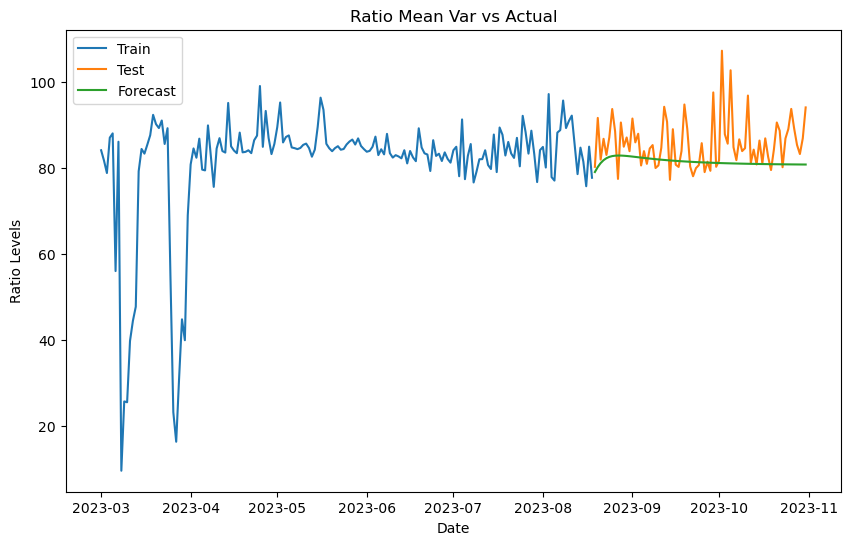

In [65]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
var_save_dir_mean = "Plots_VARMAX_mean"
os.makedirs(var_save_dir_mean, exist_ok=True)

# Compare the forecasted values with the actual values
# Assuming these series are defined elsewhere in your project:
# train_fbo0023_ratio.index = train_fbo0023_ratio.index.to_timestamp()
# test_fbo0023_ratio.index = test_fbo0023_ratio.index.to_timestamp()
# forecast.index = forecast.index.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(combined_train.index, combined_train["Ratio"], label='Train')
plt.plot(combined_test.index, combined_test["Ratio"], label='Test')
plt.plot(forecast_mean_VAR.index, forecast_mean_VAR["Ratio"], label='Forecast')
plt.title('Ratio Mean Var vs Actual')
plt.xlabel('Date')
plt.ylabel('Ratio Levels')
plt.legend()

# Specify the path and filename for saving the plot
save_path = 'data/Ratio_Mean_Var_vs_Actual.png'
plt.figtext(0.99, 0.01, f'MAE: {MAE:.2f}', horizontalalignment='right')

plt.savefig(save_path, format='png', dpi=300)
plt.show()

# Calculate Mean Absolute Error (MAE)
MAE = np.mean(abs(forecast_mean_VAR["Ratio"] - combined_test["Ratio"]))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))

# Print the save path to confirm where the file is saved
print(f"Plot saved to: {save_path}")




In [ ]:
#print(train_fbo0023_var)
print(test_fbo0023_var)

In [ ]:
# Calculate daily absolute errors
daily_errors = np.abs(forecast_fbo0023_var['Ratio'] - test_fbo0023_var['Ratio'])
#print(forecast_fbo0023)

print(daily_errors)


In [ ]:
#forecast_arima_mean.dtypes
ratio_test["Ratio"].dtypes

forecast_arima_mean.dtypes

In [ ]:
MAE_arima_mean = np.mean(abs(forecast_arima_mean - ratio_test["Ratio"]))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_arima_mean, 2)))


MAE_arima_mean_absolute =mean_absolute_percentage_error( forecast_arima_mean, ratio_test["Ratio"])
print("MAPE:"+ str(np.round(MAE_arima_mean_absolute, 2)))

In [ ]:
MAE_test_fbo0023 = np.mean(abs(forecast - test_fbo0023_ratio))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_test_fbo0023, 2)))


MAE_arima_mean_absolute_fbo0023= mean_absolute_percentage_error(forecast, test_fbo0023_ratio)
print('MAPE ' + str(np.round(MAE_arima_mean_absolute_fbo0023, 2)))


In [ ]:
MAE_mean_VAR = np.mean(abs(forecast_mean_VAR["Ratio"] - combined_test["Ratio"]))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_mean_VAR, 2)))

MAE_mean_VAR_absolute = mean_absolute_percentage_error(forecast_mean_VAR["Ratio"] , combined_test["Ratio"])
print(MAE_mean_VAR_absolute)
print('MAPE ' + str(np.round(MAE_mean_VAR_absolute, 2)))


In [ ]:
MAE_forecast_fbo0023_VAR = np.mean(abs(forecast_fbo0023_var["Ratio"] - test_fbo0023_ratio))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE_forecast_fbo0023_VAR, 2)))

MAE_forecast_fbo0023_VAR_Absolute= mean_absolute_percentage_error(forecast_fbo0023_var["Ratio"], test_fbo0023_ratio)
print('MAPE: ' + str(np.round(MAE_forecast_fbo0023_VAR_Absolute, 2)))

